In [1]:
# Objetivos
#
# Contexto: Empresa vende produtos - cliente paga com atraso N dias
# Empresa parou de pensar na venda em si passa a pensar no crédito concedido
# 
# Predizer valor de crédito concedito, valor pré-aprovado
# Estratégia de perfil - grupos de clientes
# 
# Dicionário de Dados:
#
# numero_solicitacao: Número da solicitação;
# razaoSocial: Razão Social Anonimizada;
# nomeFantasia: Nome Fantasia Anonimizado;
# cnpjSemTraco: CNPJ Anonimizado;
# maiorAtraso: Maior atraso de pagamento em dias;
# margemBrutaAcumulada: Margem bruta acumulada;
# percentualProtestos: Percentual protestos;
# primeiraCompra: Data da primeira compra na Wtec;
# prazoMedioRecebimentoVendas: prazo médio do recebimento de vendas do cliente;
# titulosEmAberto: valor total de títulos em aberto; 
# valorSolicitado: valor de crédito solicitado;
# status: Status da solicitação: 
# AprovadoAnalista: aprovado por um analista
# AprovadoComite: aprovado por um comitê, normalmente para valores mais expressivos
# AguardandoAprovacao: aguardando aprovação
# DocumentacaoReprovada: documentação reprovada
# EmAnaliseDocumentacao: em Análise da documentação
# ReprovadoAnalista: reprovado por um analista
# ReprovadoComite: reprovado por um comitê
# definicaoRisco: categorização de risco;
# percentualRisco: onde 0 é baixo e 1 é alto;
# diferencaPercentualRisco: 1 - percentualRisco;
# dashboardCorrelacao: uma correlação interna de risco, mas que os analistas não conseguiram explicar nas reuniões realizadas;
# valorAprovado: Valor que foi aprovado pelos analistas;
# dataAprovadoEmNivelAnalista: data em que a solicitação de crédito foi aprovada por um analista de crédito;
# dataAprovadoEmComite: data em que a solicitação de crédito foi aprovada por um comitê;
# periodoBalanco: Período do balanço informado na documentação da empresa;
# ativoCirculante: Ativo circulante informado na documentação da empresa;
# passivoCirculante: Passivo circulante informado na documentação da empresa;
# totalAtivo: Ativo informado na documentação da empresa;
# totalPatrimonioLiquido: Patrimonio líquido informado na documentação da empresa;
# endividamento: Endividamento informado na documentação da empresa;
# duplicatasAReceber: Duplicatas a receber informado na documentação da empresa;
# estoque: estoque Informado na documentação da empresa;
# faturamentoBruto: Faturamento bruto informado na documentação da empresa;
# margemBruta: Margem bruta informado na documentação da empresa;
# periodoDemonstrativoEmMeses: Período do demonstrativo informado na documentação da empresa;
# custos : Custos informado na documentação da empresa;
# limiteEmpresaAnaliseCredito: limite de crédito fornecido por uma empresa externa de análise de crédito;
# anoFundacao: Ano de fundação da empresa;
# intervaloFundacao: Categoria do ano de fundação;
# capitalSocial: Capital social informado na documentação da empresa;
# restricoes: Flag informando se existem restrições relacionadas ao cliente;
# empresa_MeEppMei: Flag informando se o cliente é um pequeno negócio; 
# scorePontualidade: score de pontualidade entre 0 e 1, onde é significa que o cliente é pontual; 

In [2]:
# Importando Bibliotecas
#
import sys
import pandas as pd
pd.set_option('float_format', '{:.2f}'.format)
import matplotlib.pyplot as plt
import pandas, numpy as np
np.set_printoptions(threshold=sys.maxsize)
import seaborn as sns
sns.set(rc={'figure.figsize':(14,6)})
import zipfile
from scipy import stats
import missingno as msno
from sklearn.preprocessing import LabelEncoder

In [3]:
# Importando Dados
#
df = pd.read_csv('bootcamp-solicitacoescredito.csv')

In [4]:
# Visualização inicial dados
#
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)
df.head(10)

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,valorAprovado,dataAprovadoEmComite,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.25,0.00,2015-12-10T00:00:00,0,0.00,50000.00,AprovadoAnalista,De 11 a 30 % - Baixo,0.72,0.28,0.00,50000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1766880.00,0.00,12.00,0.00,2003.00,Acima de 17 anos,90000.00,False,True,1.00,43200.00,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.00,NaN,2019-06-12T17:28:31,0,0.00,10000.00,DocumentacaoReprovada,De 0 a 10 % - Muito Baixo,1.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.62,0.00,2019-11-27T00:00:00,0,0.00,20000.00,AprovadoAnalista,De 11 a 30 % - Baixo,0.72,0.28,0.00,20000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2814940.00,0.00,7.00,0.00,2014.00,De 6 a 10 anos,20000.00,False,True,1.00,4320.00,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.00,NaN,2017-02-13T17:20:27,0,0.00,25000.00,AprovadoAnalista,De 51 a 80 % - Alto,0.40,0.60,0.49,15000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1285274.00,0.00,12.00,0.00,2013.00,De 6 a 10 anos,30000.00,False,True,0.00,5920.00,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.45,0.00,2010-07-13T00:00:00,20,1486.95,50000.00,AprovadoAnalista,De 11 a 30 % - Baixo,0.83,0.17,0.00,50000.00,NaN,2019-09-30T00:00:00,14758917.00,12149031.00,25793410.00,14544378.00,3039112.00,11797928.00,3047791.00,40779757.00,81459809.00,9.00,40680051.00,2002.00,Acima de 17 anos,75000.00,False,False,1.00,89000.00,2020-02-04T15:06:28
5,6,Liam Jackson,Gerard Gordon,KAYS53232027306925,0,0.00,NaN,2019-06-28T10:25:57,0,0.00,25000.00,AprovadoAnalista,De 31 a 50 % - Médio,0.62,0.38,0.00,20000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,918476.00,0.00,12.00,0.00,2011.00,De 6 a 10 anos,15000.00,False,True,0.00,38400.00,2020-02-04T15:10:46
6,7,Alexander Baker-Wells,Dr. Caroline Ali,PYOL43118620147076,16,0.00,NaN,2011-03-02T11:27:13,0,0.00,100000.00,AprovadoAnalista,De 31 a 50 % - Médio,0.58,0.42,-1.00,80000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239016696.00,-7540544.00,12.00,156394112.00,1982.00,Acima de 17 anos,30515674.00,True,False,0.00,18132588.00,2020-02-05T14:31:22
7,8,Jean Berry,Gregory Gould,NLUX93496216176463,4,0.35,0.00,2007-07-02T00:00:00,102,208980.00,300000.00,AprovadoAnalista,De 0 a 10 % - Muito Baixo,0.94,0.06,0.00,300000.00,NaN,2019-09-30T03:00:00,17801610.00,2538069.00,19415777.00,7519758.00,0.00,3742963.00,11902384.00,11958227.00,9357949.00,9.00,0.00,2000.00,Acima de 17 anos,120000.00,False,False,1.00,768233.00,2020-02-05T20:05:40
8,9,Elliot Stephenson,Adrian Graham,LOVL82962402474134,43,0.25,0.00,2006-07-10T00:00:00,27,6432.00,400000.00,AprovadoAnalista,De 11 a 30 % - Baixo,0.89,0.11,0.00,400000.00,NaN,2018-12-31T02:00:00,36827690.00,13843198.00,39455945.00,25612746.00,0.00,15980275.00,11420388.00,72479551.00,6233236.00,12.00,-49267738.00,2000.00,Acima de 17 anos,1000000.00,False,False,1.00,6910219.00,2020-02-05T20:07:07
9,10,Dr. Dale Dawson,Caroline Hale,NXKJ36775578171965,24,0.00,0.00,2011-02-24T00:00:00,0,22733.33,50000.00,DocumentacaoReprovada,De 0 a 10 % - Muito Baixo,1.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.83,NaN,NaN


In [5]:
df.shape

(8973, 38)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           8973 non-null   int64  
 1   razaoSocial                  8973 non-null   object 
 2   nomeFantasia                 8973 non-null   object 
 3   cnpjSemTraco                 8973 non-null   object 
 4   maiorAtraso                  8973 non-null   int64  
 5   margemBrutaAcumulada         8973 non-null   float64
 6   percentualProtestos          7475 non-null   float64
 7   primeiraCompra               8867 non-null   object 
 8   prazoMedioRecebimentoVendas  8973 non-null   int64  
 9   titulosEmAberto              8973 non-null   float64
 10  valorSolicitado              8973 non-null   float64
 11  status                       8973 non-null   object 
 12  definicaoRisco               8973 non-null   object 
 13  diferencaPercentua

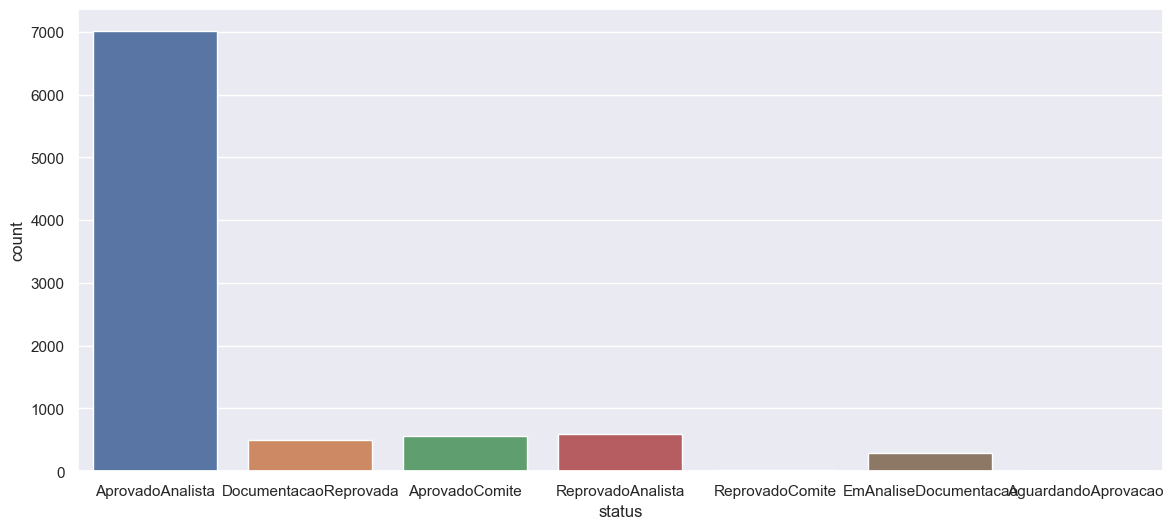

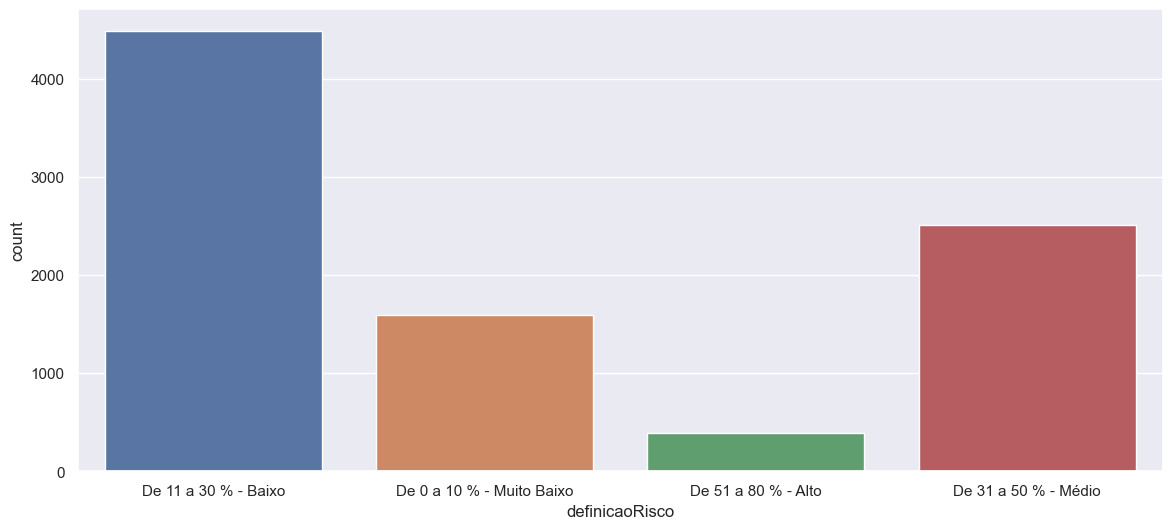

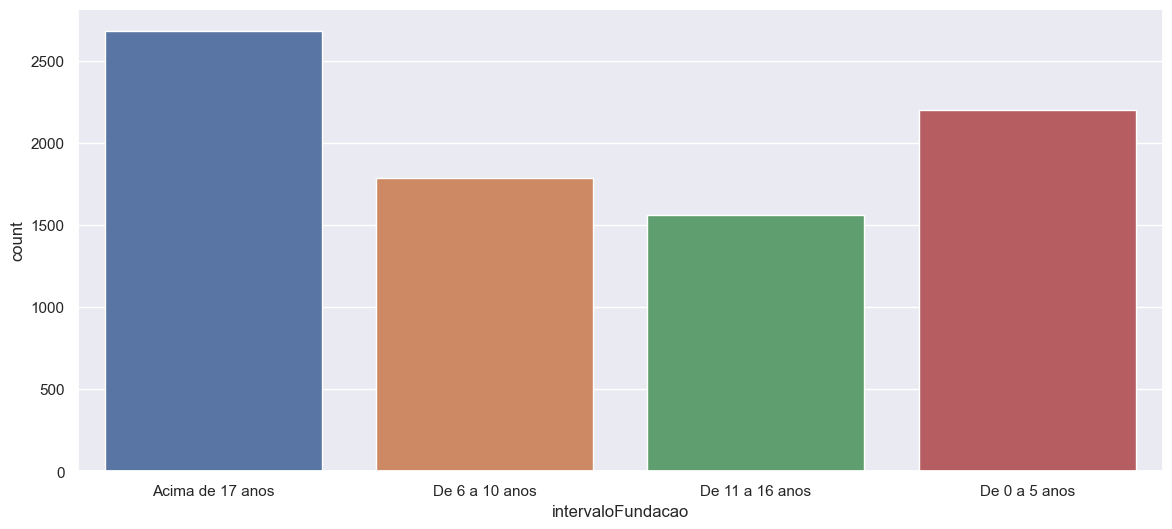

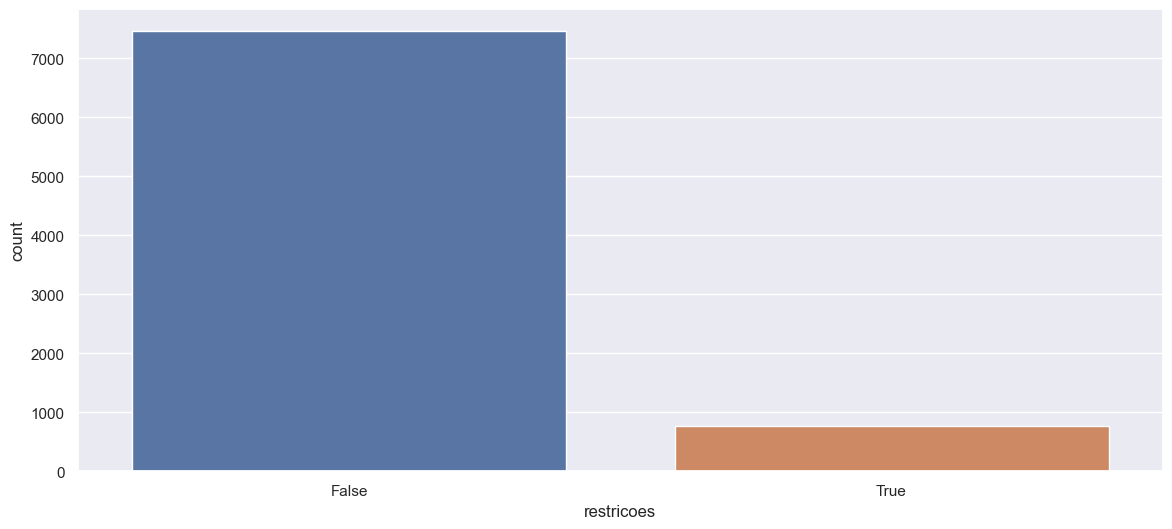

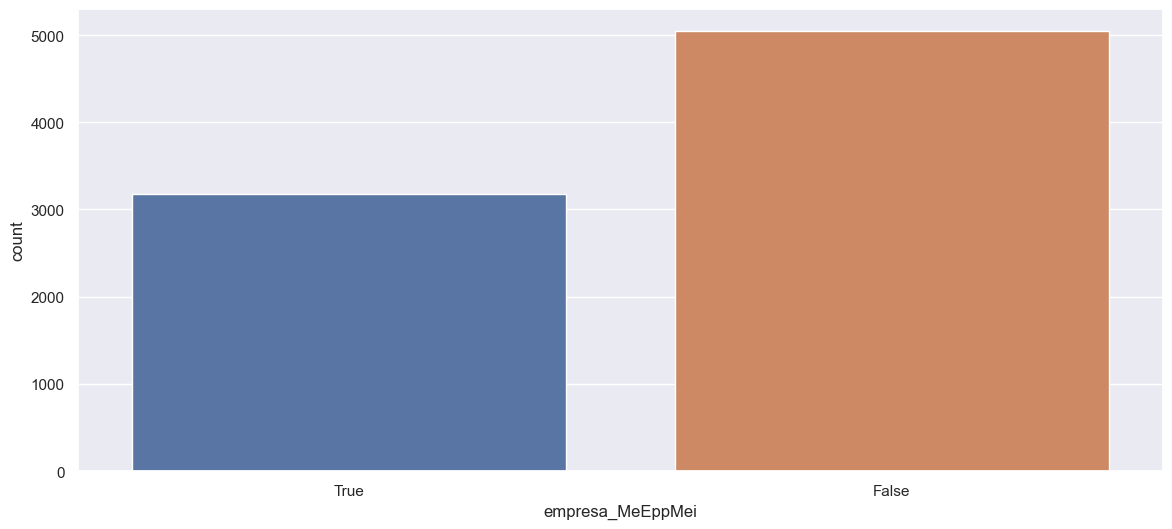

In [7]:
# Exploração
#
# Qual a contagem para as colunas categórias?
#
# Listagem de colunas categórias
categoricas = ['status', 'definicaoRisco', 'intervaloFundacao', 'restricoes', 'empresa_MeEppMei']
for i in df[categoricas]:
    plt.figure(i)
    sns.countplot(x=i, data=df[categoricas])



In [8]:
# Leitura dos gráficos categóricos 
#
# AprovadoAnalista é a grande maioria no status;
# 
# A definição de risco das solicitações maioria concentrado entre 11 e 50%;
#
# IntervaloFundacao está bem distribuido;
#
# A maioria das solicitações não tem restrições;
#
# Há uma boa distribuição entre empresa_MeEppMei pequeno negócio ou não, mas a maioria não é;

<Figure size 1400x600 with 0 Axes>

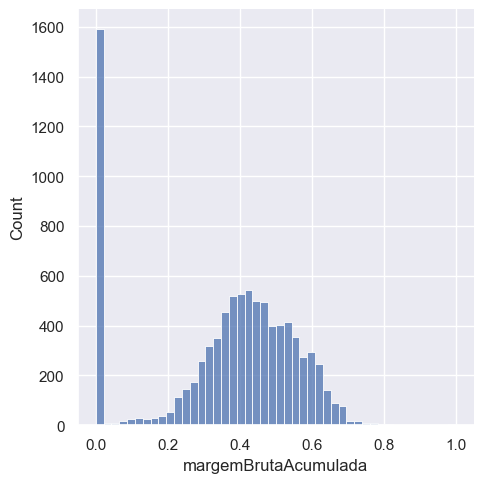

<Figure size 1400x600 with 0 Axes>

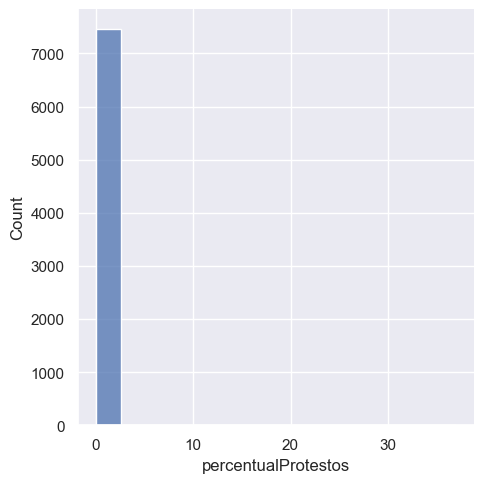

<Figure size 1400x600 with 0 Axes>

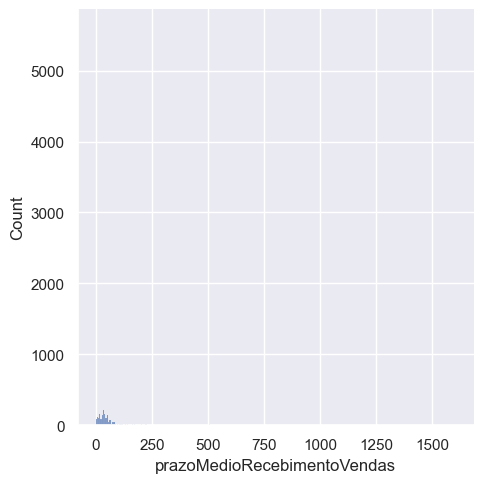

<Figure size 1400x600 with 0 Axes>

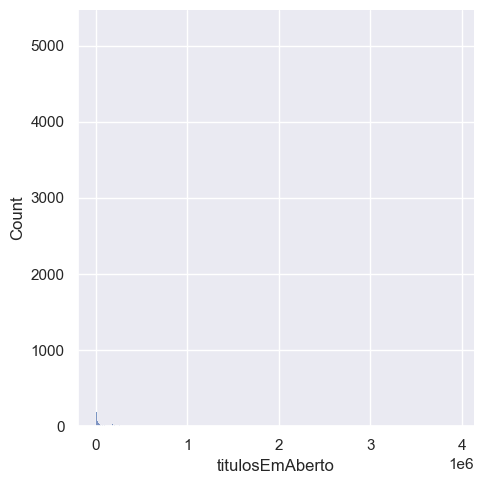

<Figure size 1400x600 with 0 Axes>

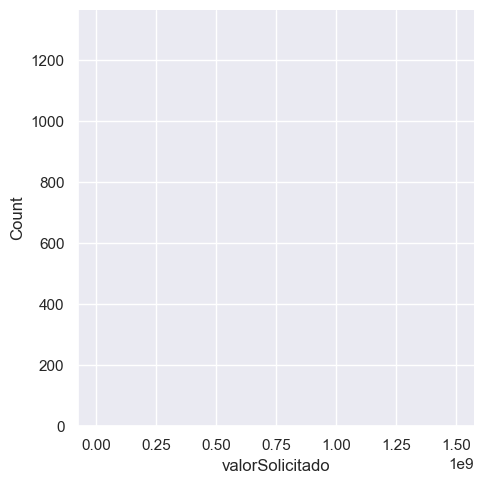

In [9]:
# Exploração
#
# Qual a distruição das colunas numéricas?
#
# Listagem de colunas numéricas
numericas_1_5 = ['margemBrutaAcumulada', 'percentualProtestos', 'prazoMedioRecebimentoVendas', 
             'titulosEmAberto', 'valorSolicitado']
for i in df[numericas_1_5]:
    plt.figure(i)
    sns.displot(x=i, data=df[numericas_1_5])

<Figure size 1400x600 with 0 Axes>

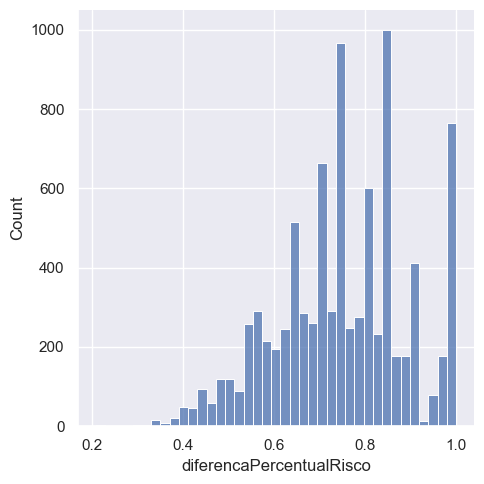

<Figure size 1400x600 with 0 Axes>

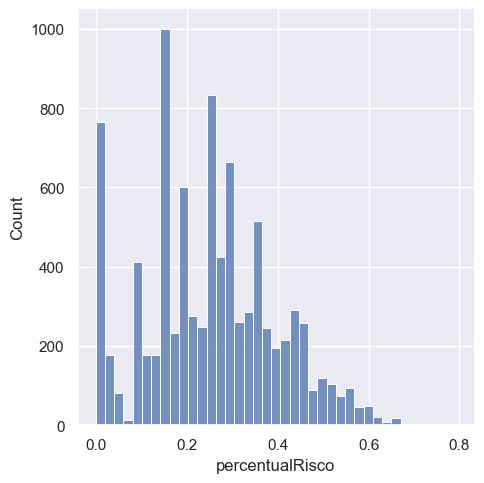

<Figure size 1400x600 with 0 Axes>

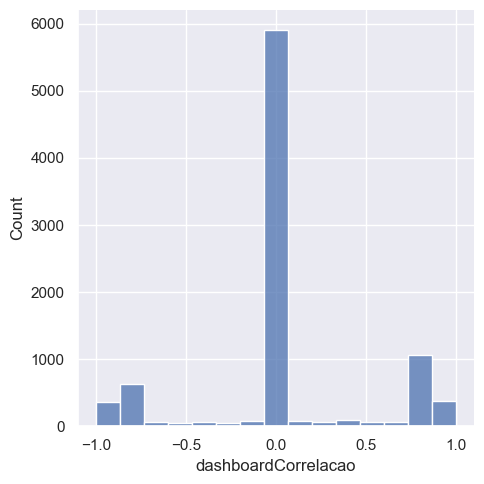

<Figure size 1400x600 with 0 Axes>

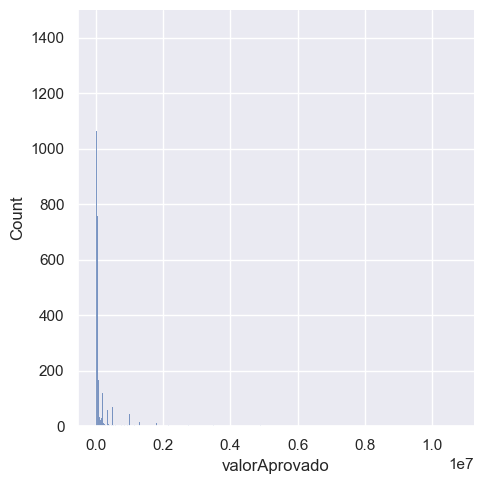

<Figure size 1400x600 with 0 Axes>

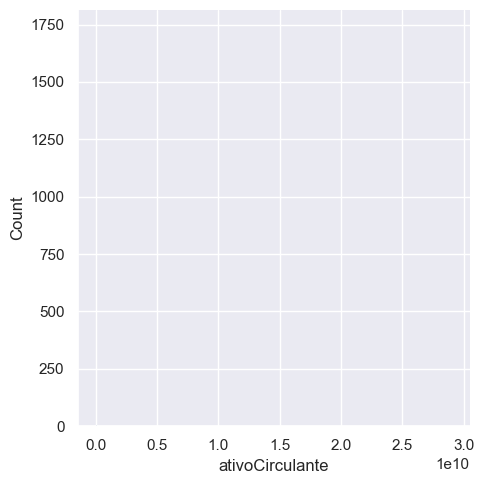

<Figure size 1400x600 with 0 Axes>

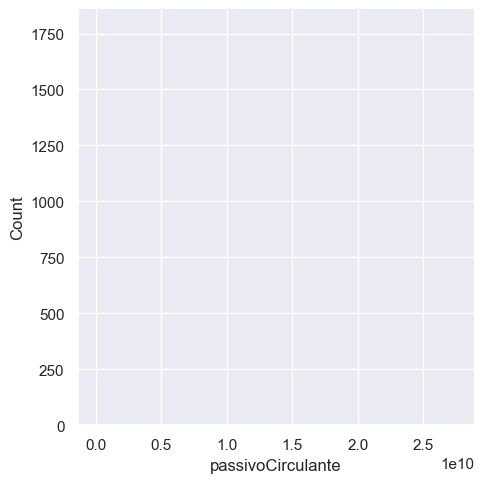

In [10]:
# Exploração
#
# Qual a distruição das colunas numéricas?
#
# Listagem de colunas numéricas
numericas_6_11 = ['diferencaPercentualRisco', 'percentualRisco', 
             'dashboardCorrelacao', 'valorAprovado', 'ativoCirculante', 'passivoCirculante']
for i in df[numericas_6_11]:
    plt.figure(i)
    sns.displot(x=i, data=df[numericas_6_11])

<Figure size 1400x600 with 0 Axes>

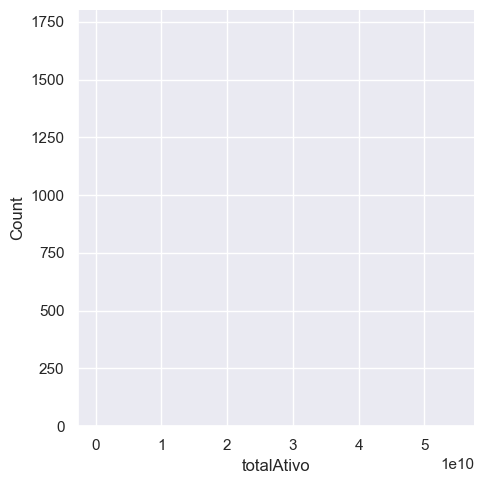

<Figure size 1400x600 with 0 Axes>

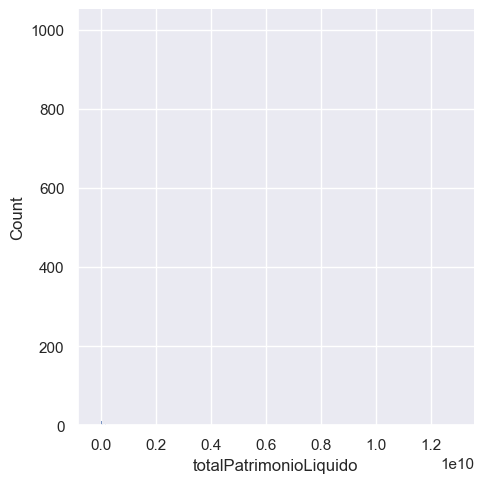

<Figure size 1400x600 with 0 Axes>

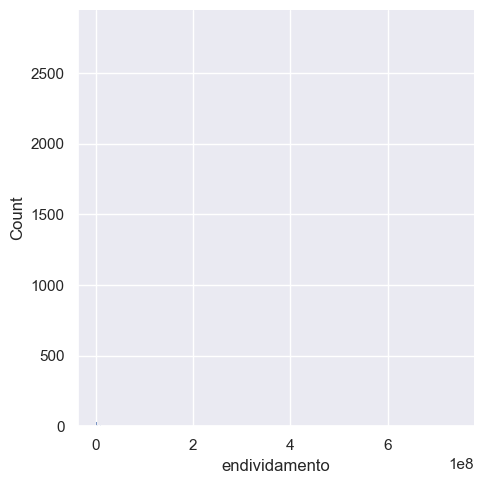

<Figure size 1400x600 with 0 Axes>

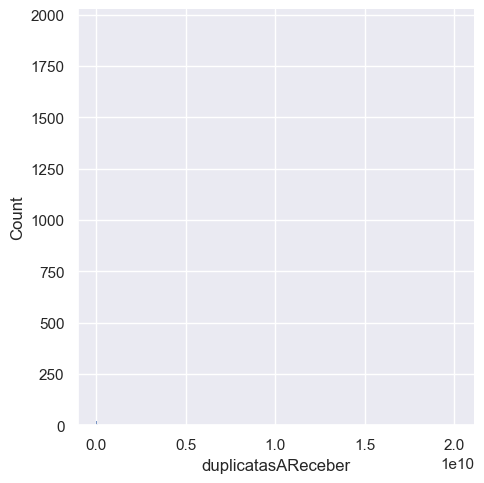

<Figure size 1400x600 with 0 Axes>

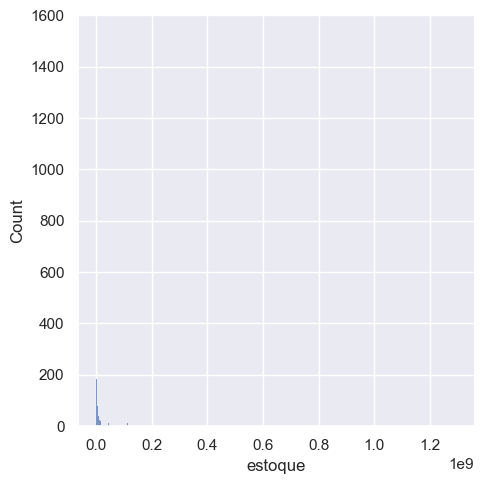

<Figure size 1400x600 with 0 Axes>

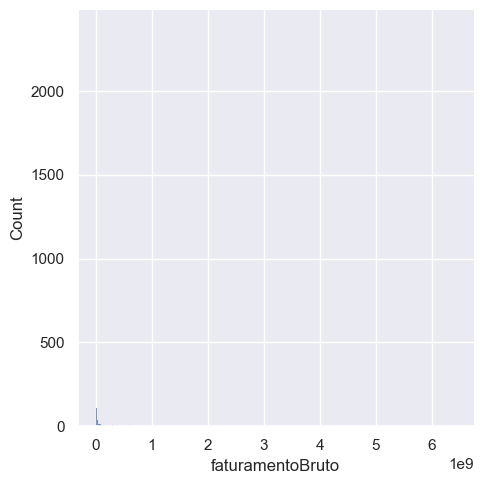

In [11]:
# Exploração
#
# Qual a distruição das colunas numéricas?
#
# Listagem de colunas numéricas
numericas_7_12 = ['totalAtivo', 
             'totalPatrimonioLiquido', 'endividamento', 'duplicatasAReceber', 'estoque', 'faturamentoBruto']
for i in df[numericas_7_12]:
    plt.figure(i)
    sns.displot(x=i, data=df[numericas_7_12])

<Figure size 1400x600 with 0 Axes>

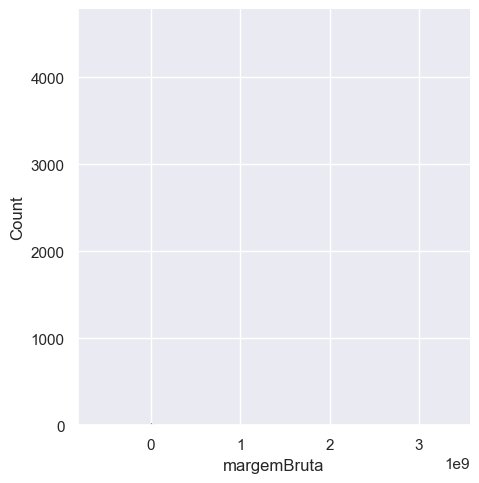

<Figure size 1400x600 with 0 Axes>

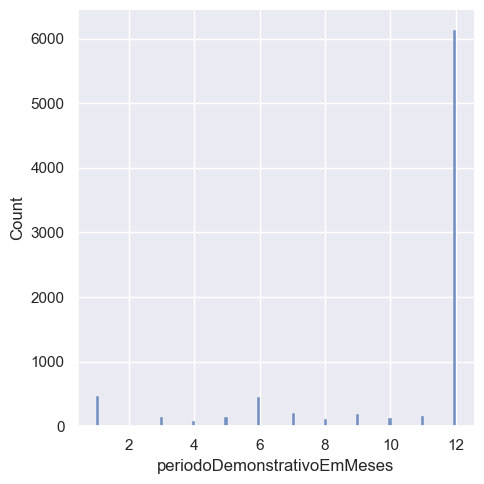

<Figure size 1400x600 with 0 Axes>

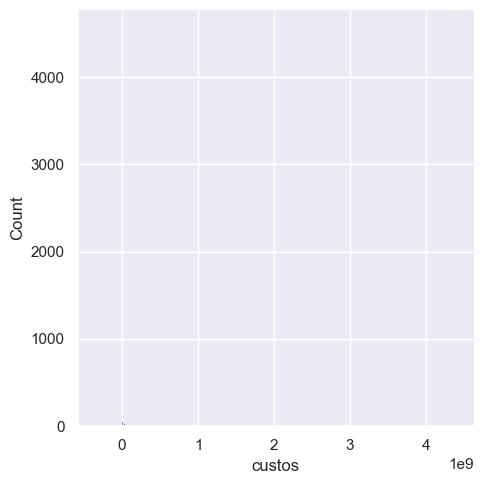

<Figure size 1400x600 with 0 Axes>

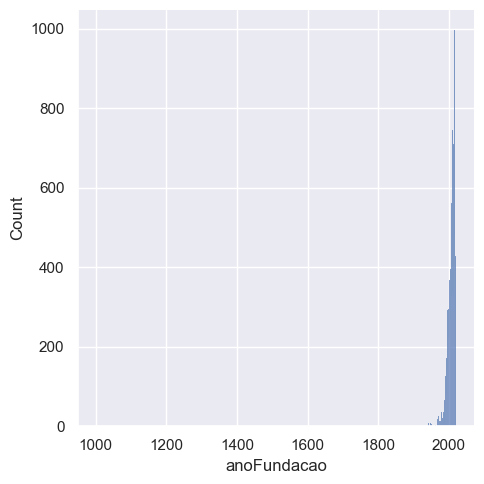

<Figure size 1400x600 with 0 Axes>

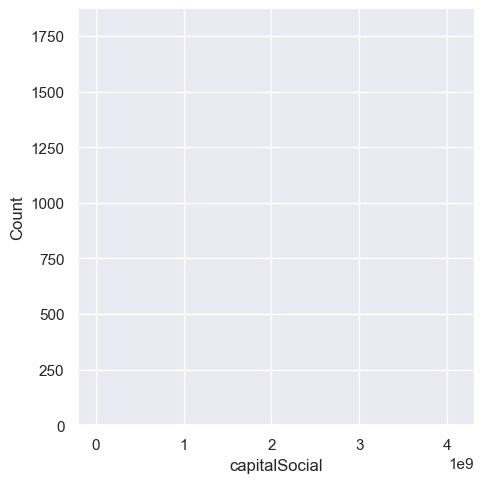

<Figure size 1400x600 with 0 Axes>

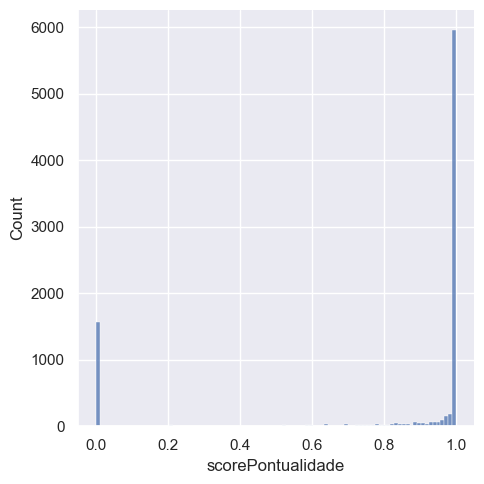

<Figure size 1400x600 with 0 Axes>

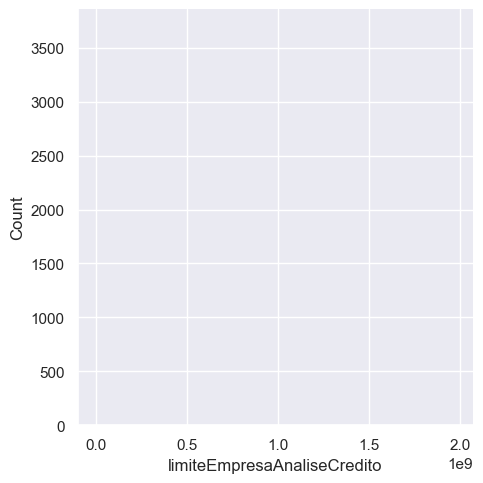

In [12]:
# Exploração
#
# Qual a distruição das colunas numéricas?
#
# Listagem de colunas numéricas
numericas_13_19 = ['margemBruta', 'periodoDemonstrativoEmMeses', 'custos', 'anoFundacao', 'capitalSocial', 
             'scorePontualidade', 'limiteEmpresaAnaliseCredito']
for i in df[numericas_13_19]:
    plt.figure(i)
    sns.displot(x=i, data=df[numericas_13_19])

<AxesSubplot:>

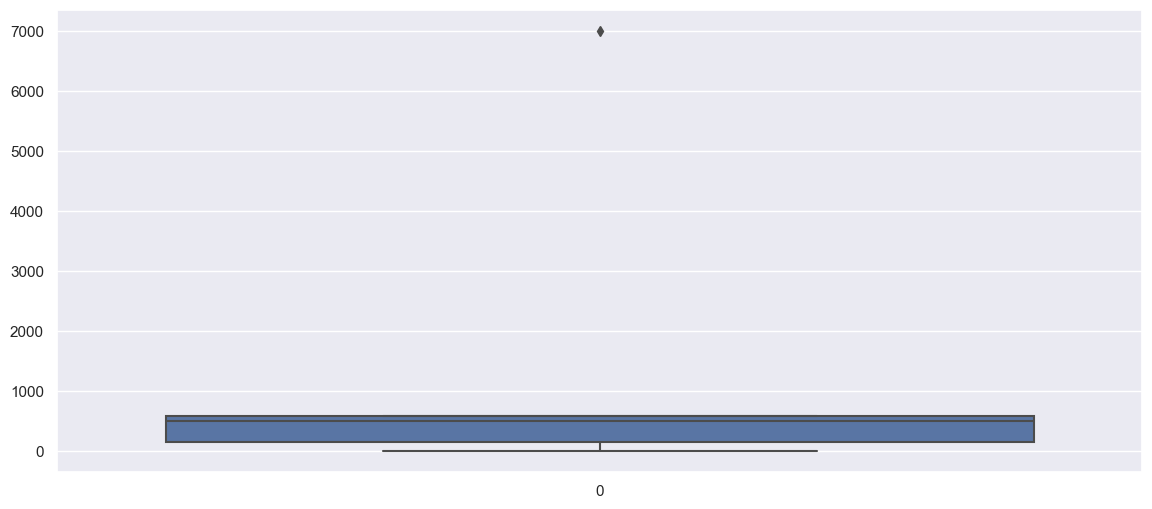

In [13]:
# Exploração
#
# Verificando outliers por meio de boxplots
#
sns.boxplot(data=df['status'].value_counts())

<AxesSubplot:>

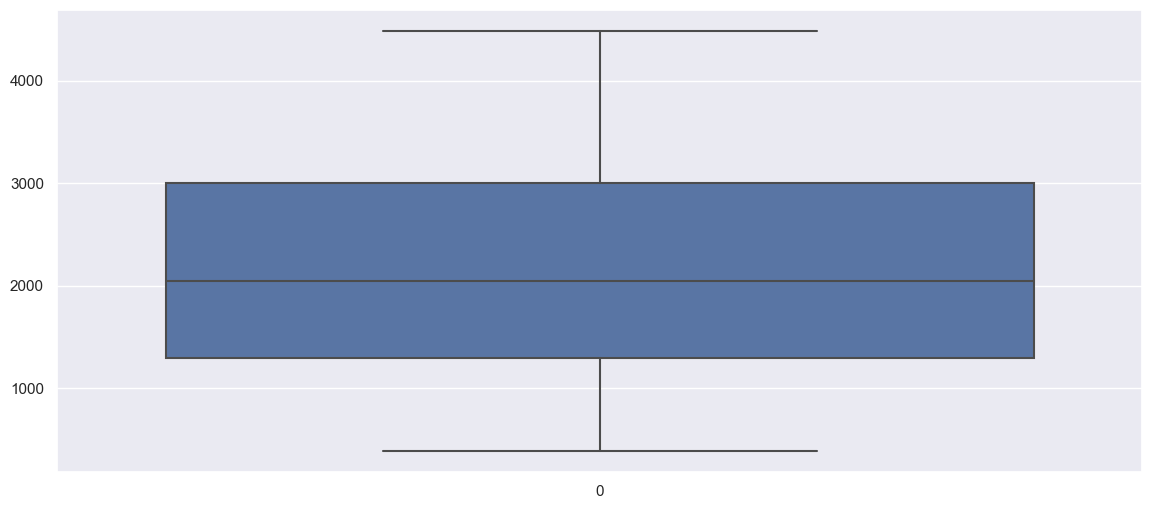

In [14]:
sns.boxplot(data=df['definicaoRisco'].value_counts())

<AxesSubplot:>

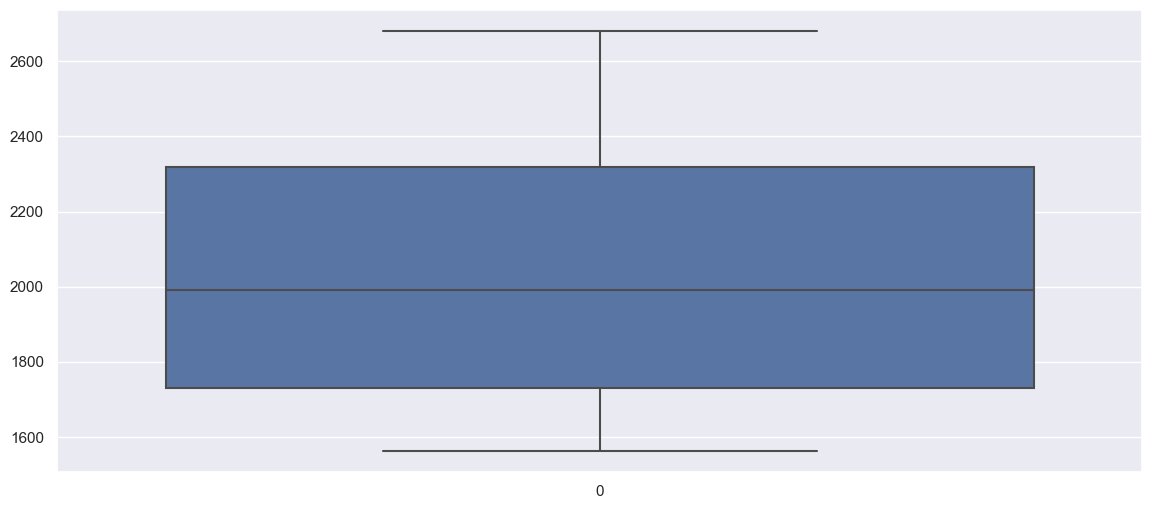

In [15]:
sns.boxplot(data=df['intervaloFundacao'].value_counts())

<AxesSubplot:>

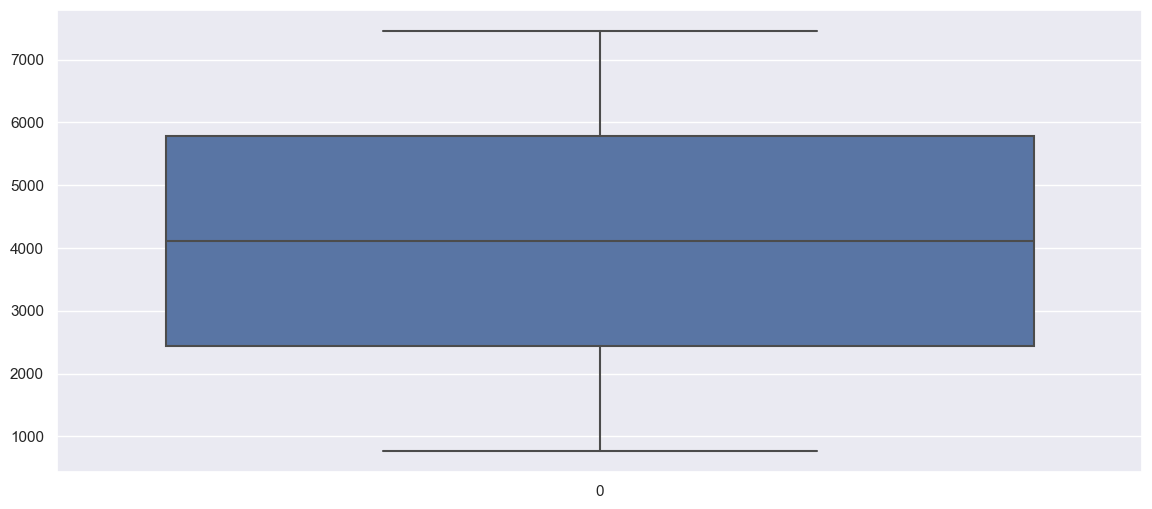

In [16]:
sns.boxplot(data=df['restricoes'].value_counts())

<AxesSubplot:>

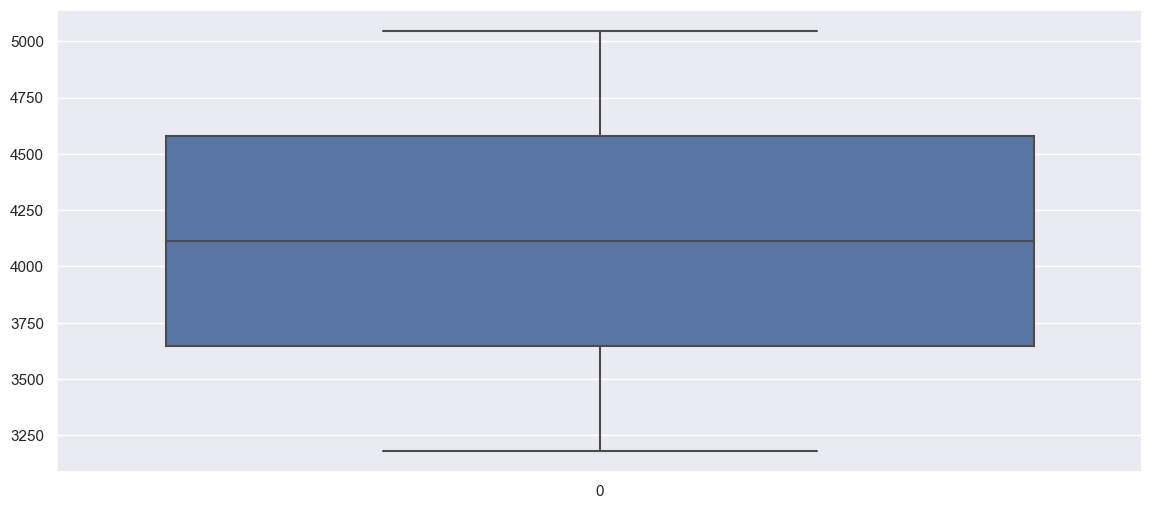

In [17]:
sns.boxplot(data=df['empresa_MeEppMei'].value_counts())

<AxesSubplot:>

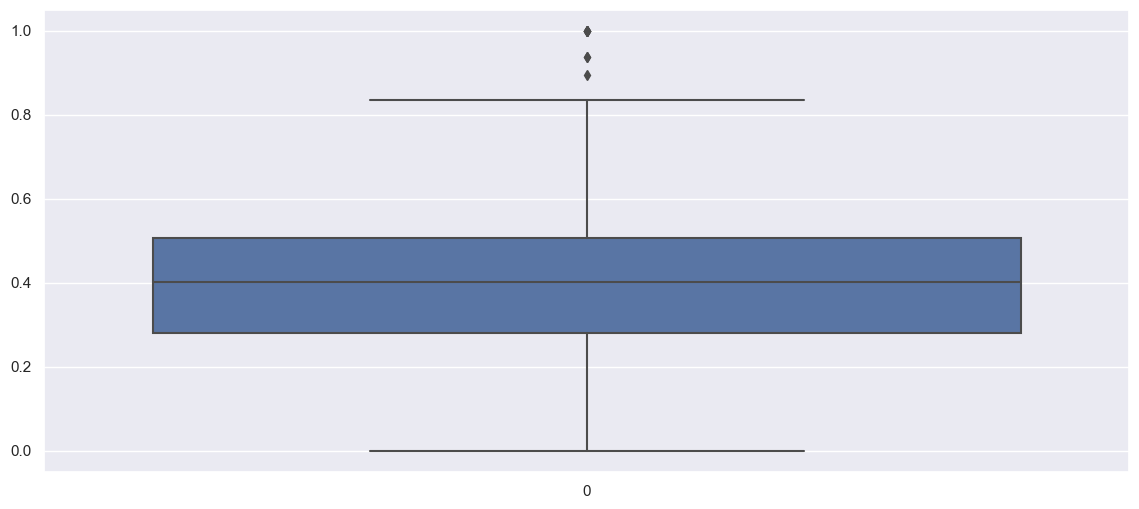

In [18]:
# Explorando outliers nas variáveis numéricas
sns.boxplot(data=df['margemBrutaAcumulada'])

<AxesSubplot:>

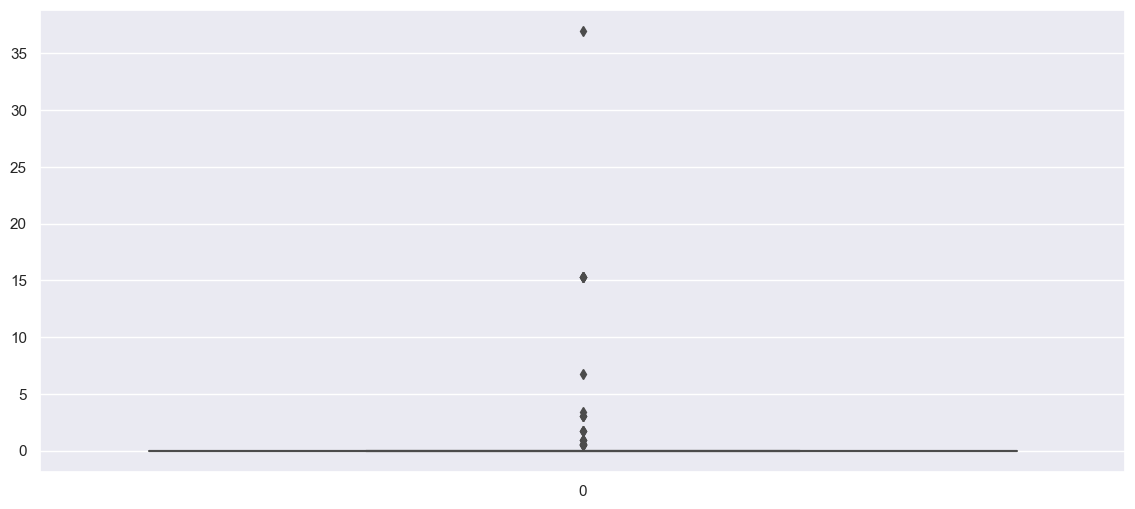

In [19]:
sns.boxplot(data=df['percentualProtestos'])

<AxesSubplot:>

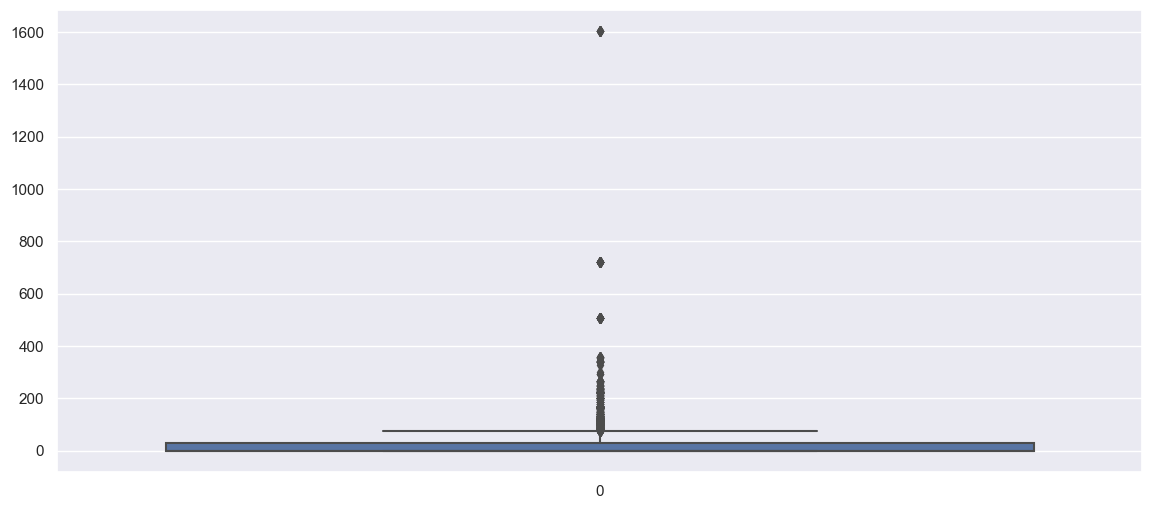

In [20]:
sns.boxplot(data=df['prazoMedioRecebimentoVendas'])

<AxesSubplot:>

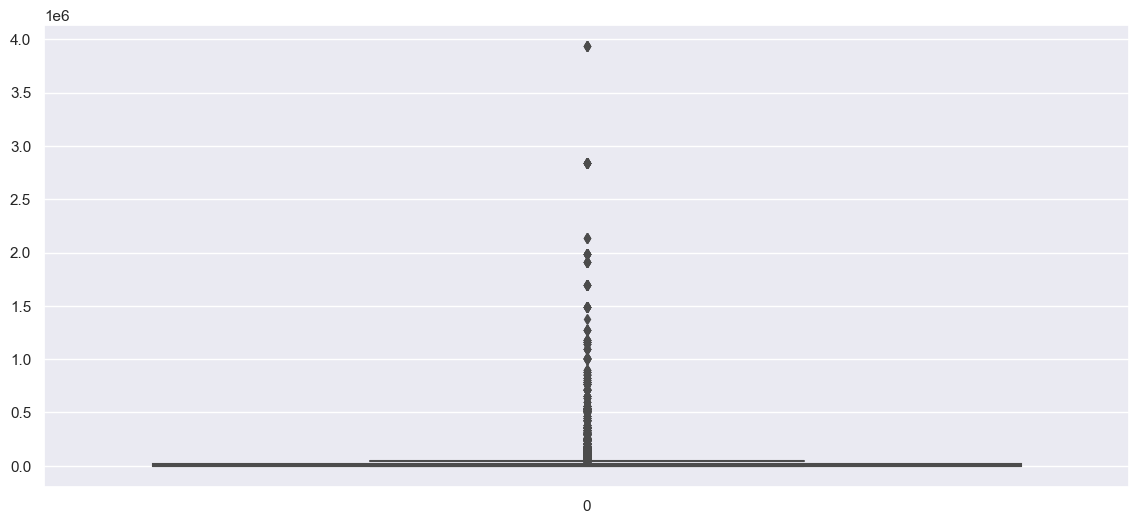

In [21]:
sns.boxplot(data=df['titulosEmAberto'])

<AxesSubplot:>

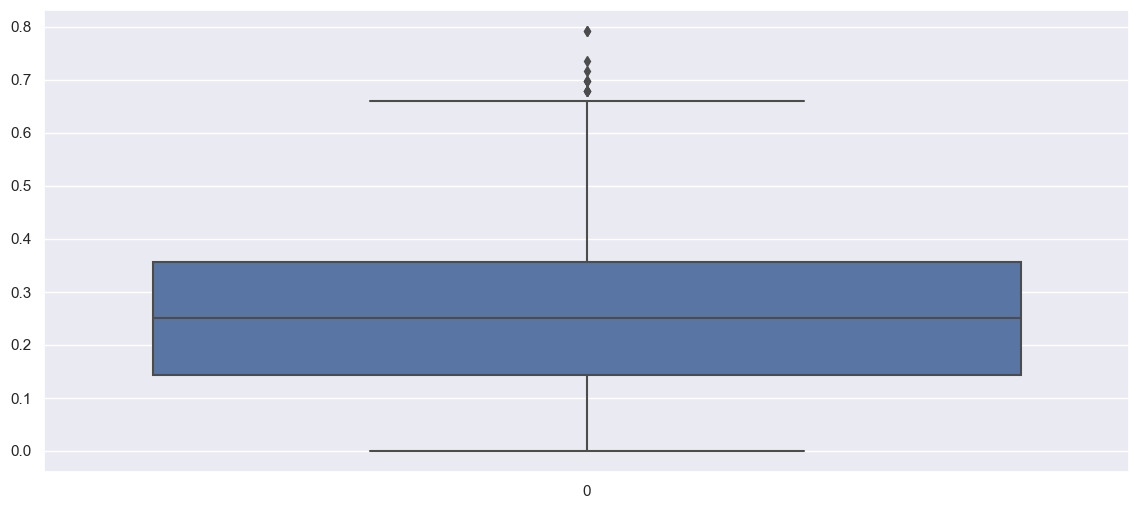

In [22]:
sns.boxplot(data=df['percentualRisco'])

<AxesSubplot:>

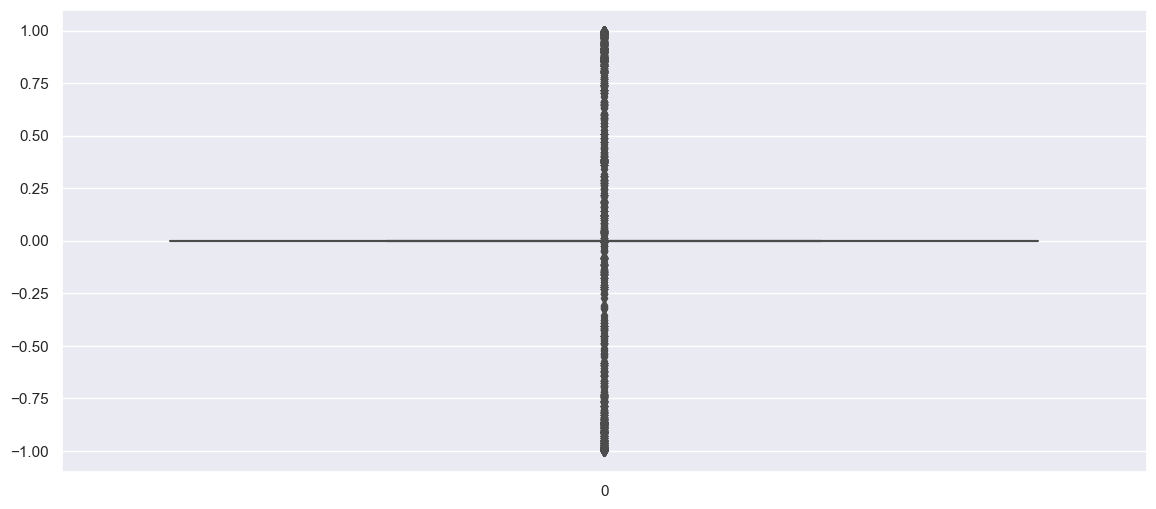

In [23]:
sns.boxplot(data=df['dashboardCorrelacao'])

<AxesSubplot:>

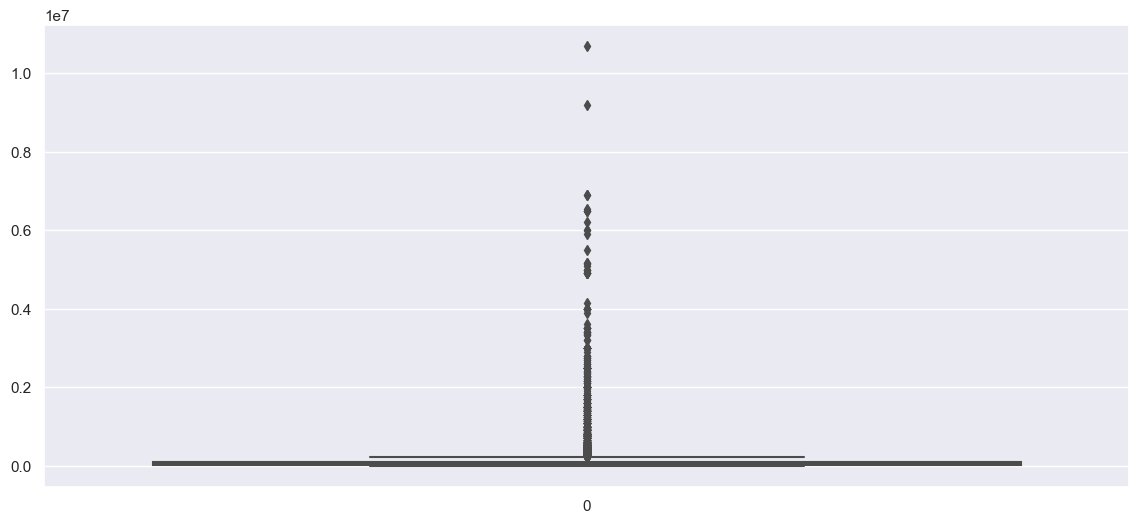

In [24]:
sns.boxplot(data=df['valorAprovado'])

<AxesSubplot:>

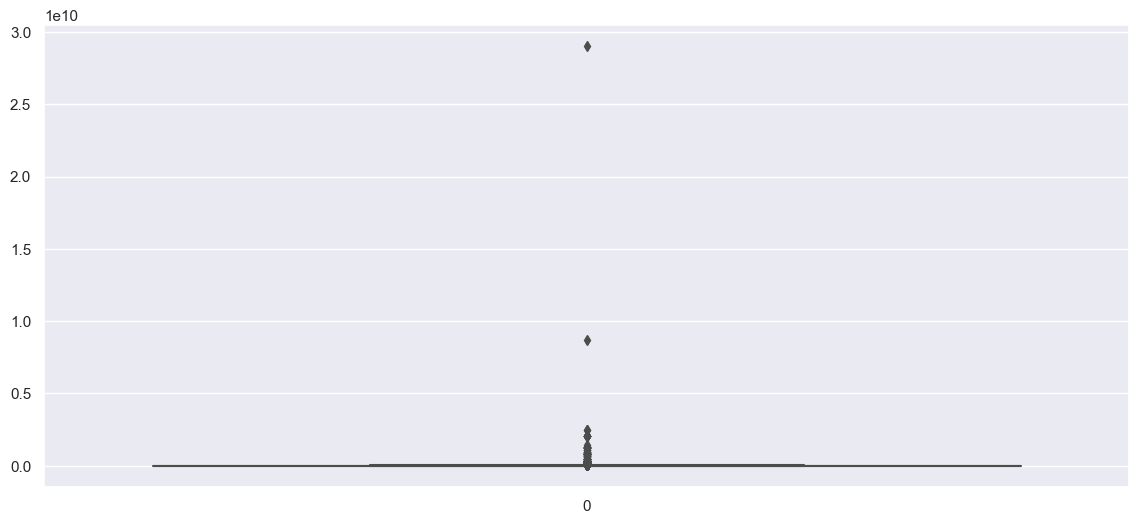

In [25]:
sns.boxplot(data=df['ativoCirculante'])

<AxesSubplot:>

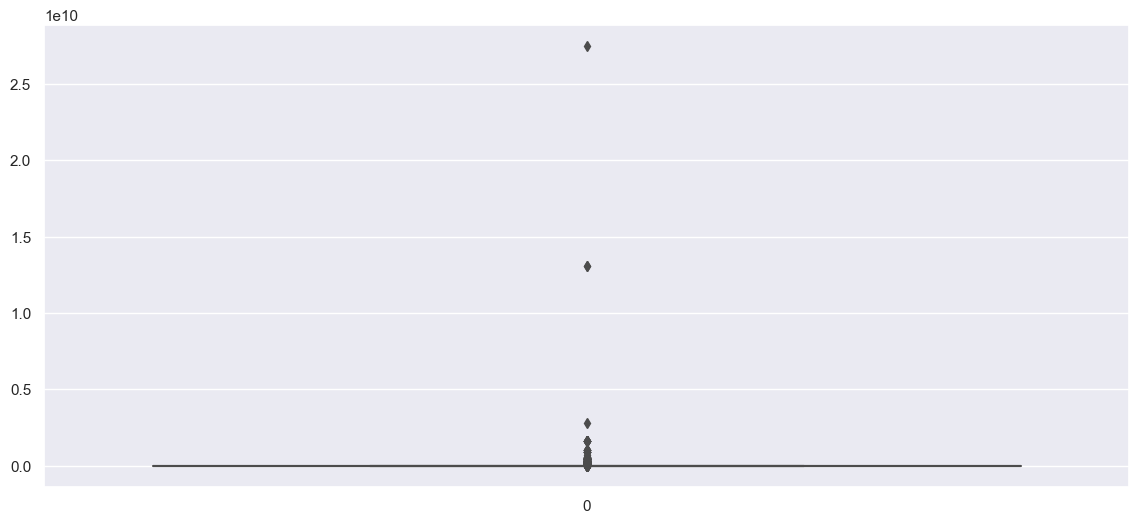

In [26]:
sns.boxplot(data=df['passivoCirculante'])

<AxesSubplot:>

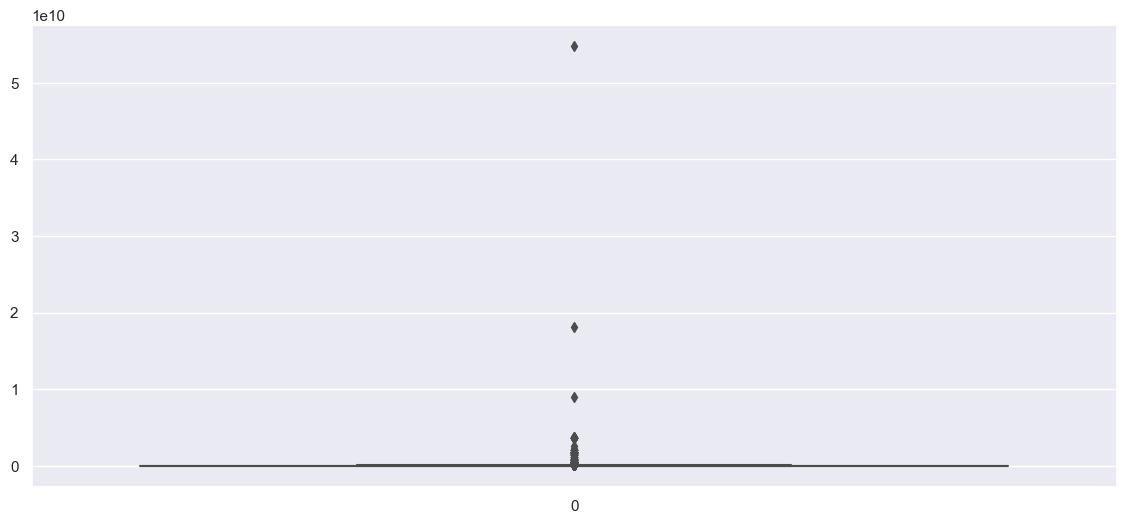

In [27]:
sns.boxplot(data=df['totalAtivo'])

<AxesSubplot:>

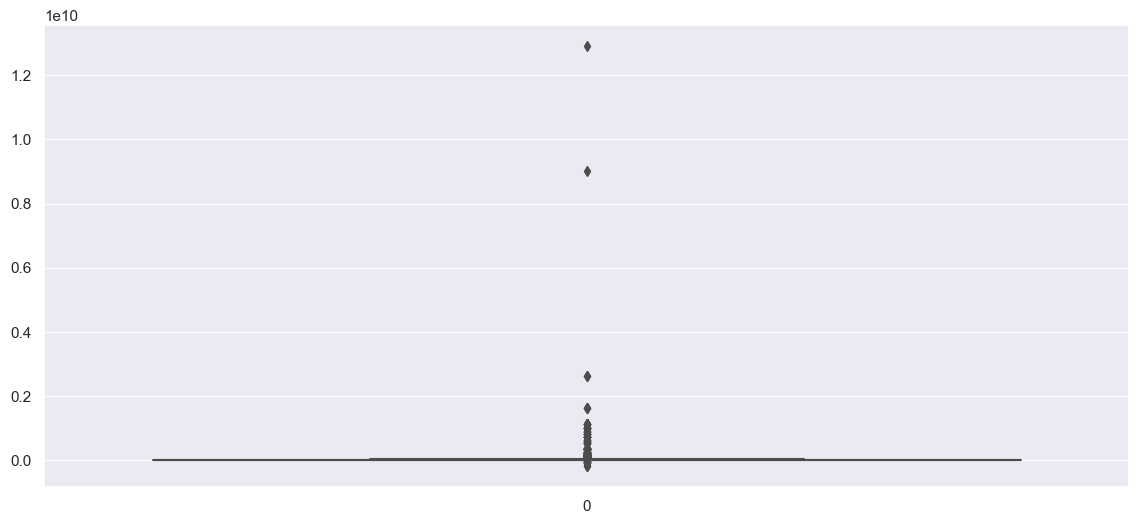

In [28]:
sns.boxplot(data=df['totalPatrimonioLiquido'])

<AxesSubplot:>

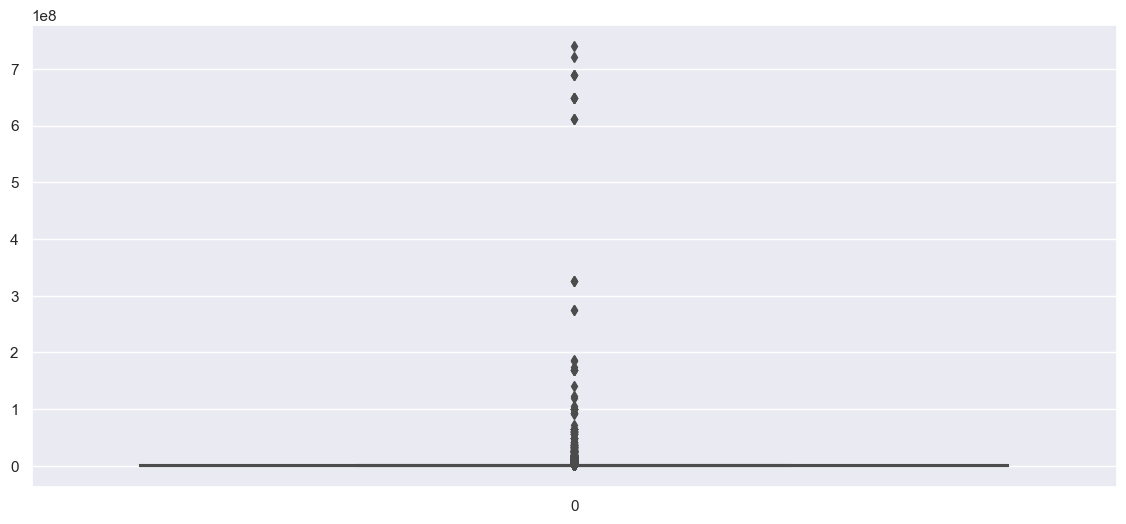

In [29]:
sns.boxplot(data=df['endividamento'])

<AxesSubplot:>

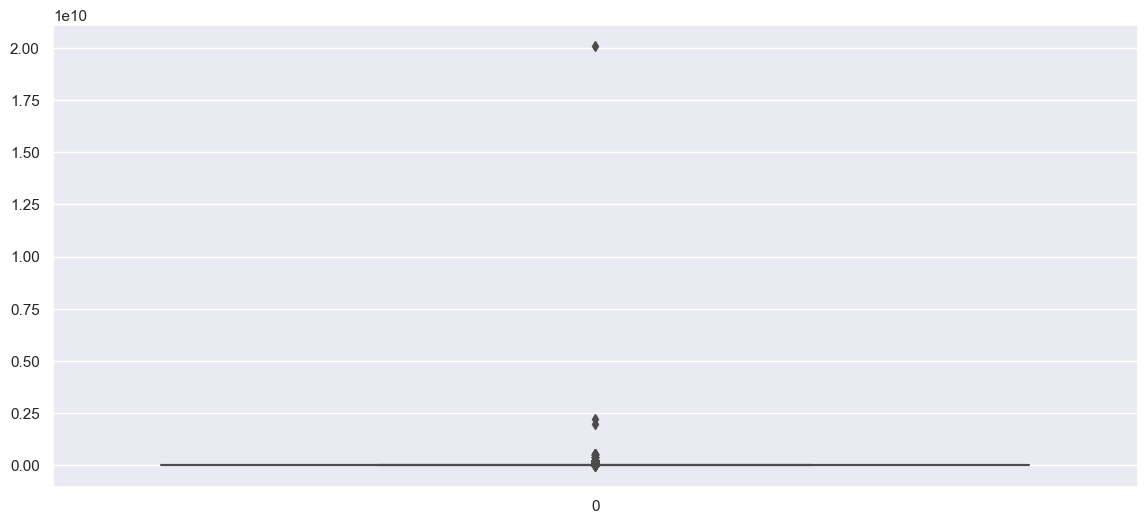

In [30]:
sns.boxplot(data=df['duplicatasAReceber'])

<AxesSubplot:>

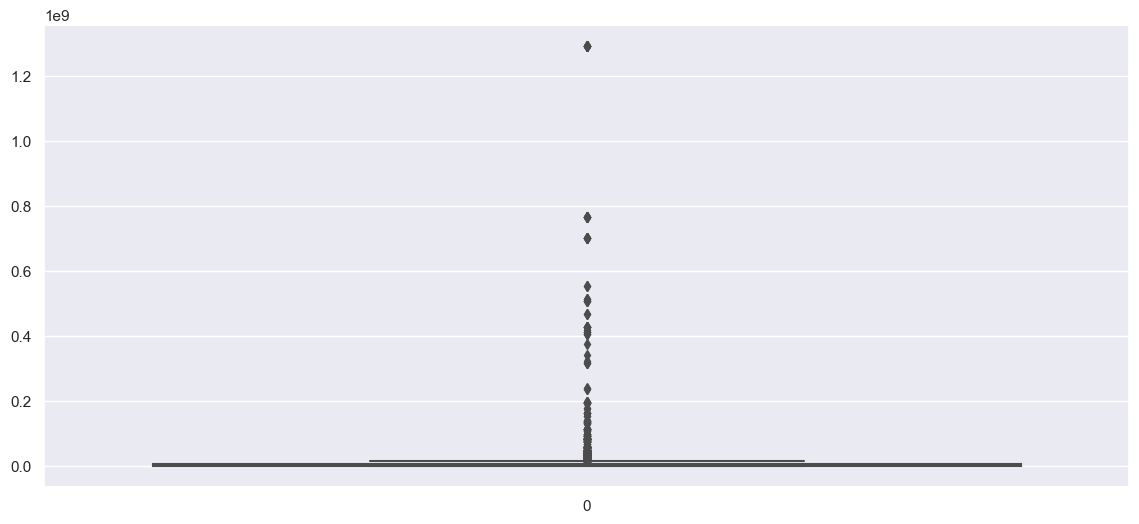

In [31]:
sns.boxplot(data=df['estoque'])

<AxesSubplot:>

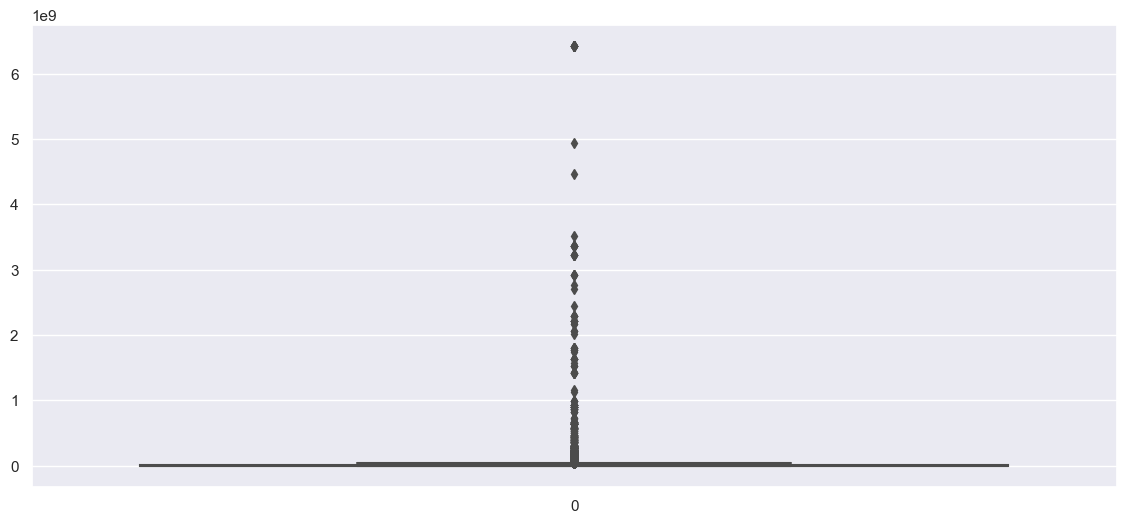

In [32]:
sns.boxplot(data=df['faturamentoBruto'])

<AxesSubplot:>

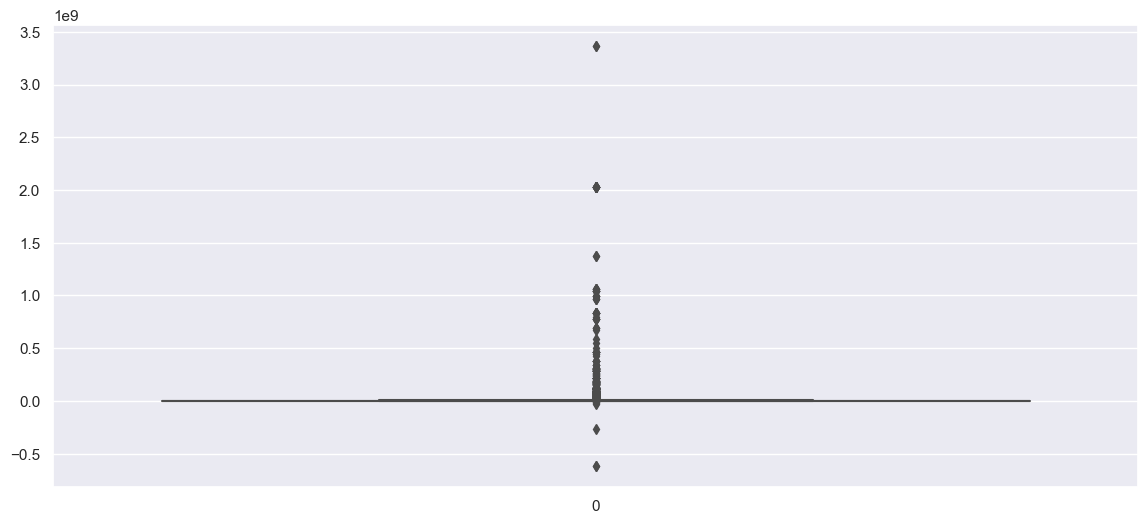

In [33]:
sns.boxplot(data=df['margemBruta'])

<AxesSubplot:>

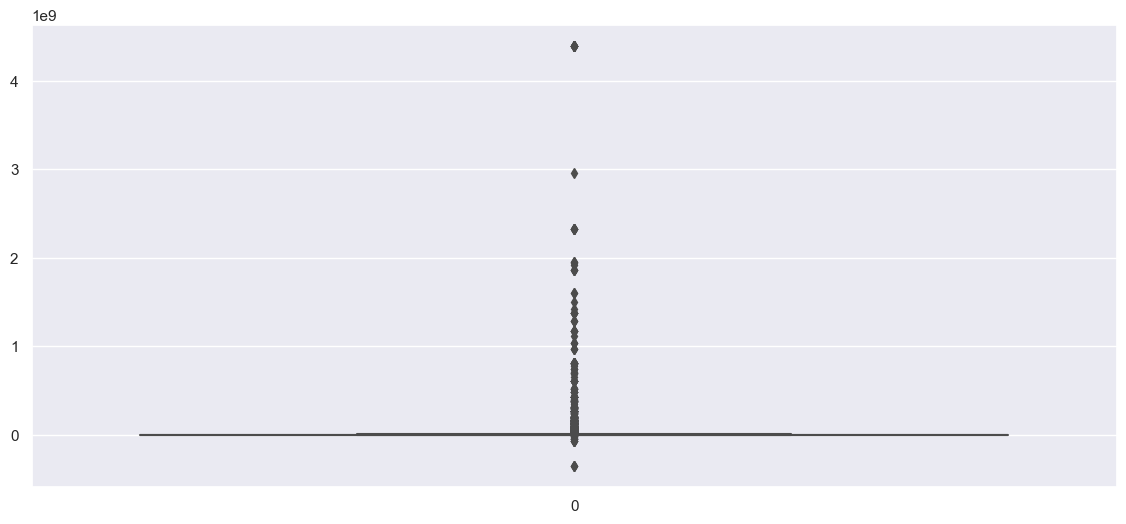

In [34]:
sns.boxplot(data=df['custos'])

<AxesSubplot:>

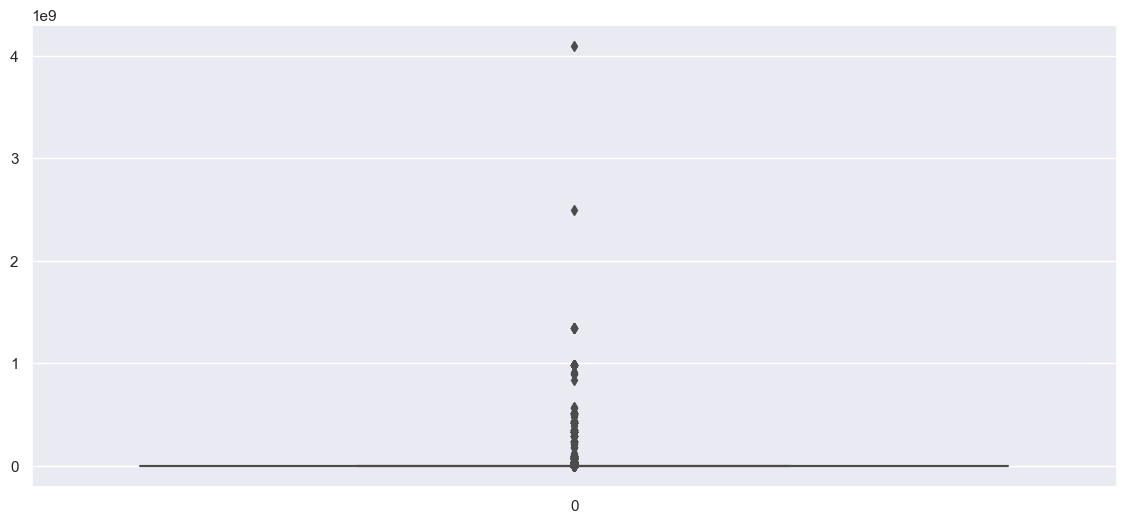

In [35]:
sns.boxplot(data=df['capitalSocial'])

<AxesSubplot:>

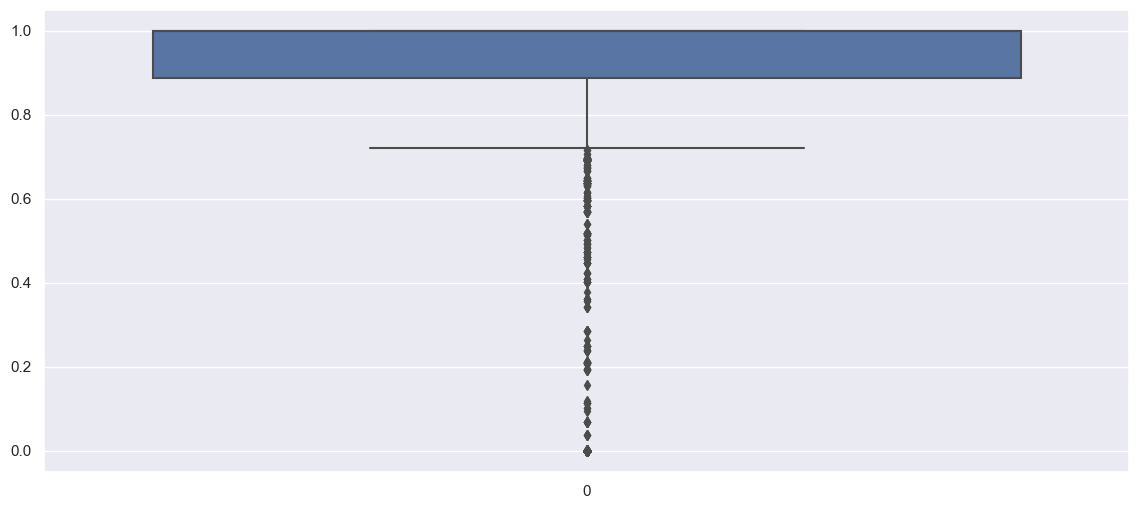

In [36]:
sns.boxplot(data=df['scorePontualidade'])

<AxesSubplot:>

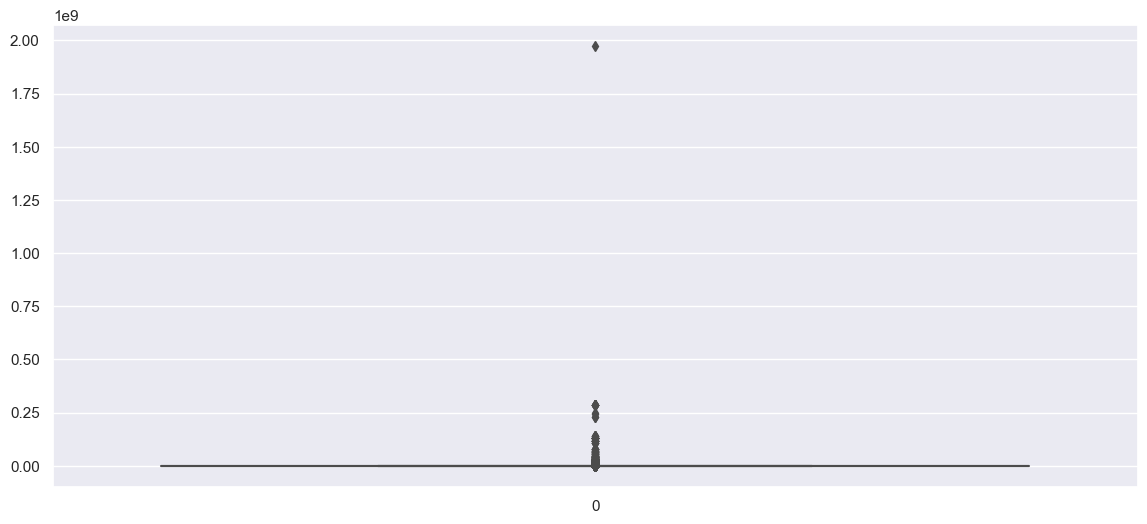

In [37]:
sns.boxplot(data=df['limiteEmpresaAnaliseCredito'])

In [38]:
# Campos com outliers consideráveis:
#
# Nas categóricas: status
#
# Nas numéricas: margemBrutaAcumulada, percentualProtestos, prazoMedioRecebimentoVendas, titulosEmAberto
#percentualRisco, dashboardCorrelacao, ativoCirculante, passivoCirculante, totalAtivo, totalPatrimonioLiquido,
#endividamento, duplicatasAReceber, estoque, faturamentoBruto, margemBruta, custos, capitalSocial, 
#scorePontualidade, limiteEmpresaAnaliseCredito

In [54]:
# Remoção de outliers automatizado
#
# Numéricas para remover:
numericas_outlier = ['margemBrutaAcumulada', 'percentualProtestos', 
                     'prazoMedioRecebimentoVendas', 'titulosEmAberto', 
                     'percentualRisco', 'dashboardCorrelacao', 'ativoCirculante', 
                     'passivoCirculante', 'totalAtivo', 'totalPatrimonioLiquido', 
                     'endividamento', 'duplicatasAReceber', 'estoque', 'faturamentoBruto', 
                     'margemBruta', 'custos', 'capitalSocial', 'scorePontualidade', 'limiteEmpresaAnaliseCredito']

q_low = df[numericas_outlier].quantile(0.02)
q_hi  = df[numericas_outlier].quantile(0.98)

df_sem_outliers = df[(df[numericas_outlier] < q_hi) & (df[numericas_outlier] > q_low)]
df[numericas_outlier] = df_sem_outliers[numericas_outlier]
df

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,valorAprovado,dataAprovadoEmComite,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.25,NaN,2015-12-10T00:00:00,NaN,NaN,50000.00,AprovadoAnalista,De 11 a 30 % - Baixo,0.72,0.28,0.00,50000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1766880.00,NaN,12.00,NaN,2003.00,Acima de 17 anos,90000.00,False,True,NaN,43200.00,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,NaN,NaN,2019-06-12T17:28:31,NaN,NaN,10000.00,DocumentacaoReprovada,De 0 a 10 % - Muito Baixo,1.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.62,NaN,2019-11-27T00:00:00,NaN,NaN,20000.00,AprovadoAnalista,De 11 a 30 % - Baixo,0.72,0.28,0.00,20000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2814940.00,NaN,7.00,NaN,2014.00,De 6 a 10 anos,20000.00,False,True,NaN,4320.00,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,NaN,NaN,2017-02-13T17:20:27,NaN,NaN,25000.00,AprovadoAnalista,De 51 a 80 % - Alto,0.40,NaN,0.49,15000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1285274.00,NaN,12.00,NaN,2013.00,De 6 a 10 anos,30000.00,False,True,NaN,5920.00,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.45,NaN,2010-07-13T00:00:00,20.00,1486.95,50000.00,AprovadoAnalista,De 11 a 30 % - Baixo,0.83,0.17,0.00,50000.00,NaN,2019-09-30T00:00:00,14758917.00,12149031.00,25793410.00,14544378.00,3039112.00,11797928.00,3047791.00,40779757.00,81459809.00,9.00,40680051.00,2002.00,Acima de 17 anos,75000.00,False,False,NaN,89000.00,2020-02-04T15:06:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,9041,Leah Williams,Georgia Booth,YKGZ02907098931653,149,0.31,NaN,2006-04-26T00:00:00,59.00,599964.04,900000.00,EmAnaliseDocumentacao,De 0 a 10 % - Muito Baixo,1.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN
8969,9042,Mr. Jordan Stevens,Miss Ellie Kelly,UCBM91111020900951,23,0.33,NaN,2016-08-03T00:00:00,NaN,NaN,150000.00,EmAnaliseDocumentacao,De 0 a 10 % - Muito Baixo,1.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.96,NaN,NaN
8970,9043,Mr. Barry Wells,Danielle Hudson,CLDB61185288622179,3,0.38,NaN,2018-10-25T00:00:00,4.00,2933.38,150000.00,EmAnaliseDocumentacao,De 0 a 10 % - Muito Baixo,1.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8971,9044,Keith Jones,Steven Kennedy-Jones,BRJP37453437154592,11,0.42,NaN,2011-08-10T00:00:00,31.00,559679.98,1290000.00,EmAnaliseDocumentacao,De 0 a 10 % - Muito Baixo,1.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN


<AxesSubplot:>

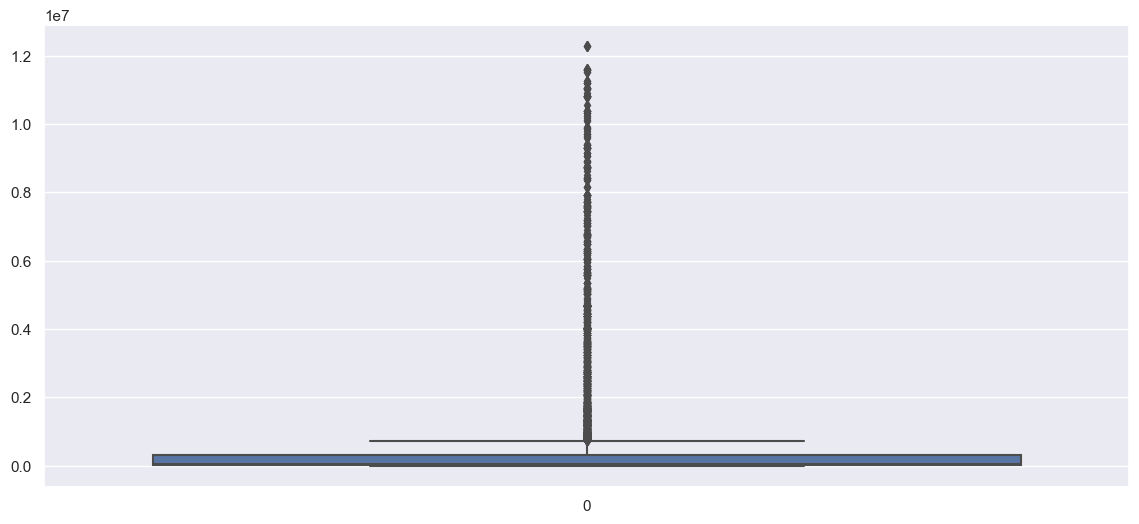

In [57]:
# Verificando os resultados em algumas variáveis
sns.boxplot(data=df_sem_outliers['limiteEmpresaAnaliseCredito'])

<AxesSubplot:>

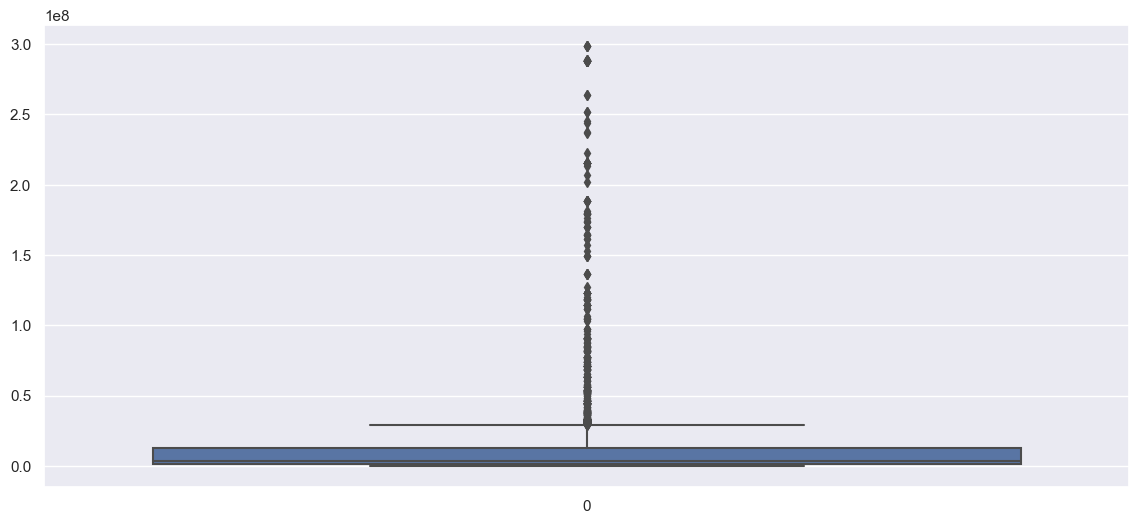

In [41]:
sns.boxplot(data=df_sem_outliers['margemBruta'])

In [42]:
# df_sem_outliers   pronto para uso
# Iniciando busca por missing values

<AxesSubplot:>

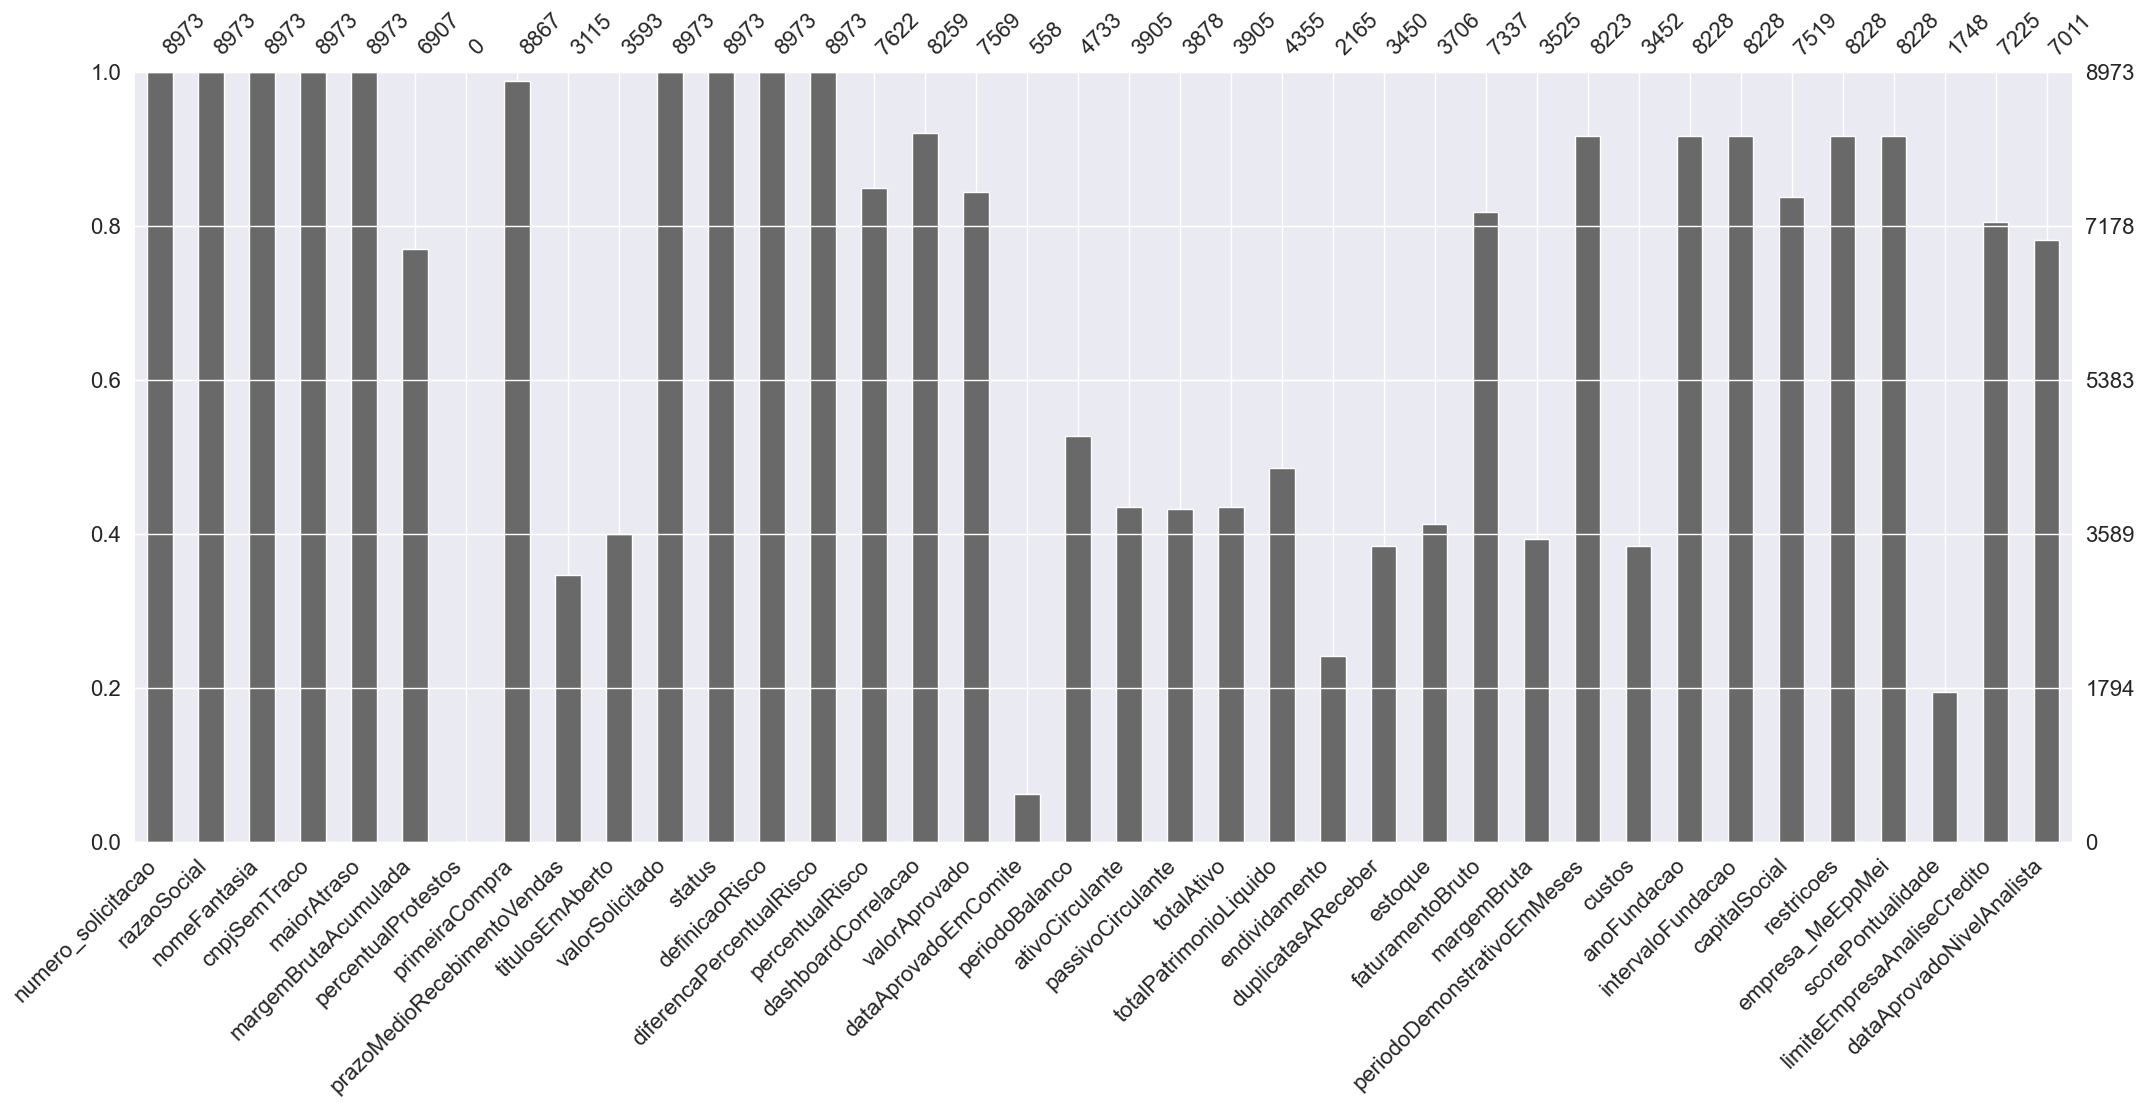

In [58]:
# Missing values por porcentagem em barras
msno.bar(df)

<AxesSubplot:>

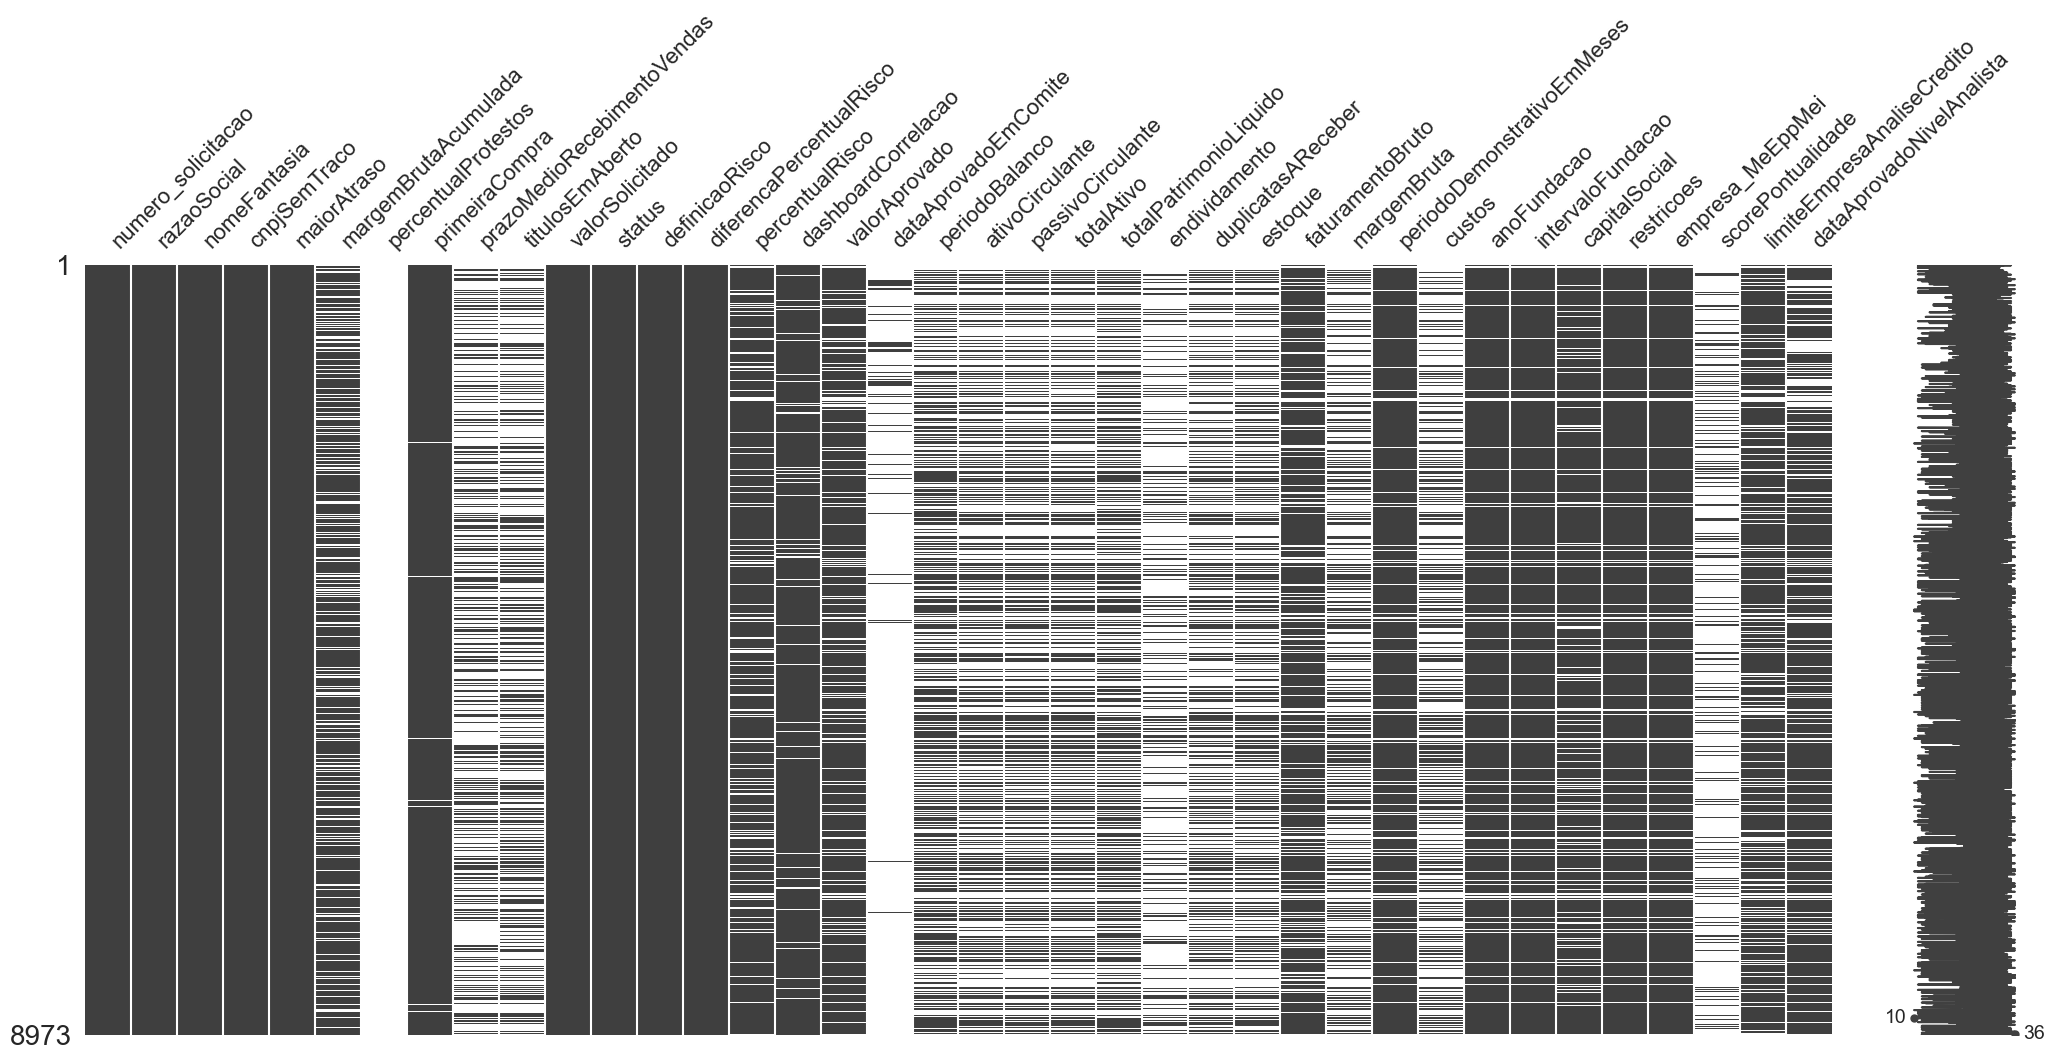

In [59]:
# Missing em matriz por número do índice 
msno.matrix(df)

In [45]:
# Variáveis com mais de 80% de missing values: dataAprovadoEmComite;
#
# Variáveis com mais de 40% de missing values: ativoCirculante, passivoCirculante, 
#                                              totalAtivo, totalPatrimonioLiquido, endividamento, duplicatasAReceber, estoque;
#
# Variáveis com mais de 20% de missing values: dataAprovadoNivelAnalista
#
# Variáveis com mais de 10% de missing values: percentualProtestos, valorAprovado


# Sentido de negócio para valores ausentes:
# 
# Variáveis de data aprovação: Nem todos os pedidos foram aprovados, 
# logo os missing values se explicam como reprovados ou não analisados;
#
# Variáveis valor aprovado: Nem todos os pedidos são aprovados, logo faz sentido manter;
#
# Variáveis de valores são realmente ausentes já que quando é zero existe o preenchimento do campo;


# Conclusão variáveis para tratar: ativoCirculante, passivoCirculante, totalAtivo, 
#                                  totalPatrimonioLiquido, endividamento, duplicatasAReceber, estoque, percentualProtestos
# Irei gerar dois DFs, um dropando os NAs citados e outro preenchendo esses NAs;

In [46]:
# DF drop NA
variaveis_na = ['ativoCirculante', 'passivoCirculante', 'totalAtivo', 
                'totalPatrimonioLiquido', 'endividamento', 'duplicatasAReceber', 
                'estoque', 'percentualProtestos']

df_drop_na = df.dropna(axis=0, subset = variaveis_na)
df_drop_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3946 entries, 4 to 8963
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           3946 non-null   int64  
 1   razaoSocial                  3946 non-null   object 
 2   nomeFantasia                 3946 non-null   object 
 3   cnpjSemTraco                 3946 non-null   object 
 4   maiorAtraso                  3946 non-null   int64  
 5   margemBrutaAcumulada         3946 non-null   float64
 6   percentualProtestos          3946 non-null   float64
 7   primeiraCompra               3931 non-null   object 
 8   prazoMedioRecebimentoVendas  3946 non-null   int64  
 9   titulosEmAberto              3946 non-null   float64
 10  valorSolicitado              3946 non-null   float64
 11  status                       3946 non-null   object 
 12  definicaoRisco               3946 non-null   object 
 13  diferencaPercentua

In [47]:
# DF mean NA
variaveis_na = ['ativoCirculante', 'passivoCirculante', 'totalAtivo', 
                'totalPatrimonioLiquido', 'endividamento', 'duplicatasAReceber', 
                'estoque', 'percentualProtestos']

df_mean_na = df.fillna(df[variaveis_na].mean())
df_mean_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           8973 non-null   int64  
 1   razaoSocial                  8973 non-null   object 
 2   nomeFantasia                 8973 non-null   object 
 3   cnpjSemTraco                 8973 non-null   object 
 4   maiorAtraso                  8973 non-null   int64  
 5   margemBrutaAcumulada         8973 non-null   float64
 6   percentualProtestos          8973 non-null   float64
 7   primeiraCompra               8867 non-null   object 
 8   prazoMedioRecebimentoVendas  8973 non-null   int64  
 9   titulosEmAberto              8973 non-null   float64
 10  valorSolicitado              8973 non-null   float64
 11  status                       8973 non-null   object 
 12  definicaoRisco               8973 non-null   object 
 13  diferencaPercentua

In [48]:
# Ambos os DF preparadas para comparação em modelagem;
#
# Iniciando busca por correlações simples em ambos os DFs gerados.

In [49]:
df_drop_na[categoricas]

,status,definicaoRisco,intervaloFundacao,restricoes,empresa_MeEppMei
4,AprovadoAnalista,De 11 a 30 % - Baixo,Acima de 17 anos,False,False
7,AprovadoAnalista,De 0 a 10 % - Muito Baixo,Acima de 17 anos,False,False
8,AprovadoAnalista,De 11 a 30 % - Baixo,Acima de 17 anos,False,False
14,AprovadoAnalista,De 11 a 30 % - Baixo,Acima de 17 anos,False,False
19,AprovadoAnalista,De 11 a 30 % - Baixo,Acima de 17 anos,False,False
...,...,...,...,...,...
8958,AprovadoAnalista,De 11 a 30 % - Baixo,De 11 a 16 anos,False,False
8959,ReprovadoAnalista,De 11 a 30 % - Baixo,De 11 a 16 anos,False,False
8960,AprovadoAnalista,De 11 a 30 % - Baixo,De 0 a 5 anos,False,True
8961,AprovadoAnalista,De 11 a 30 % - Baixo,Acima de 17 anos,False,False


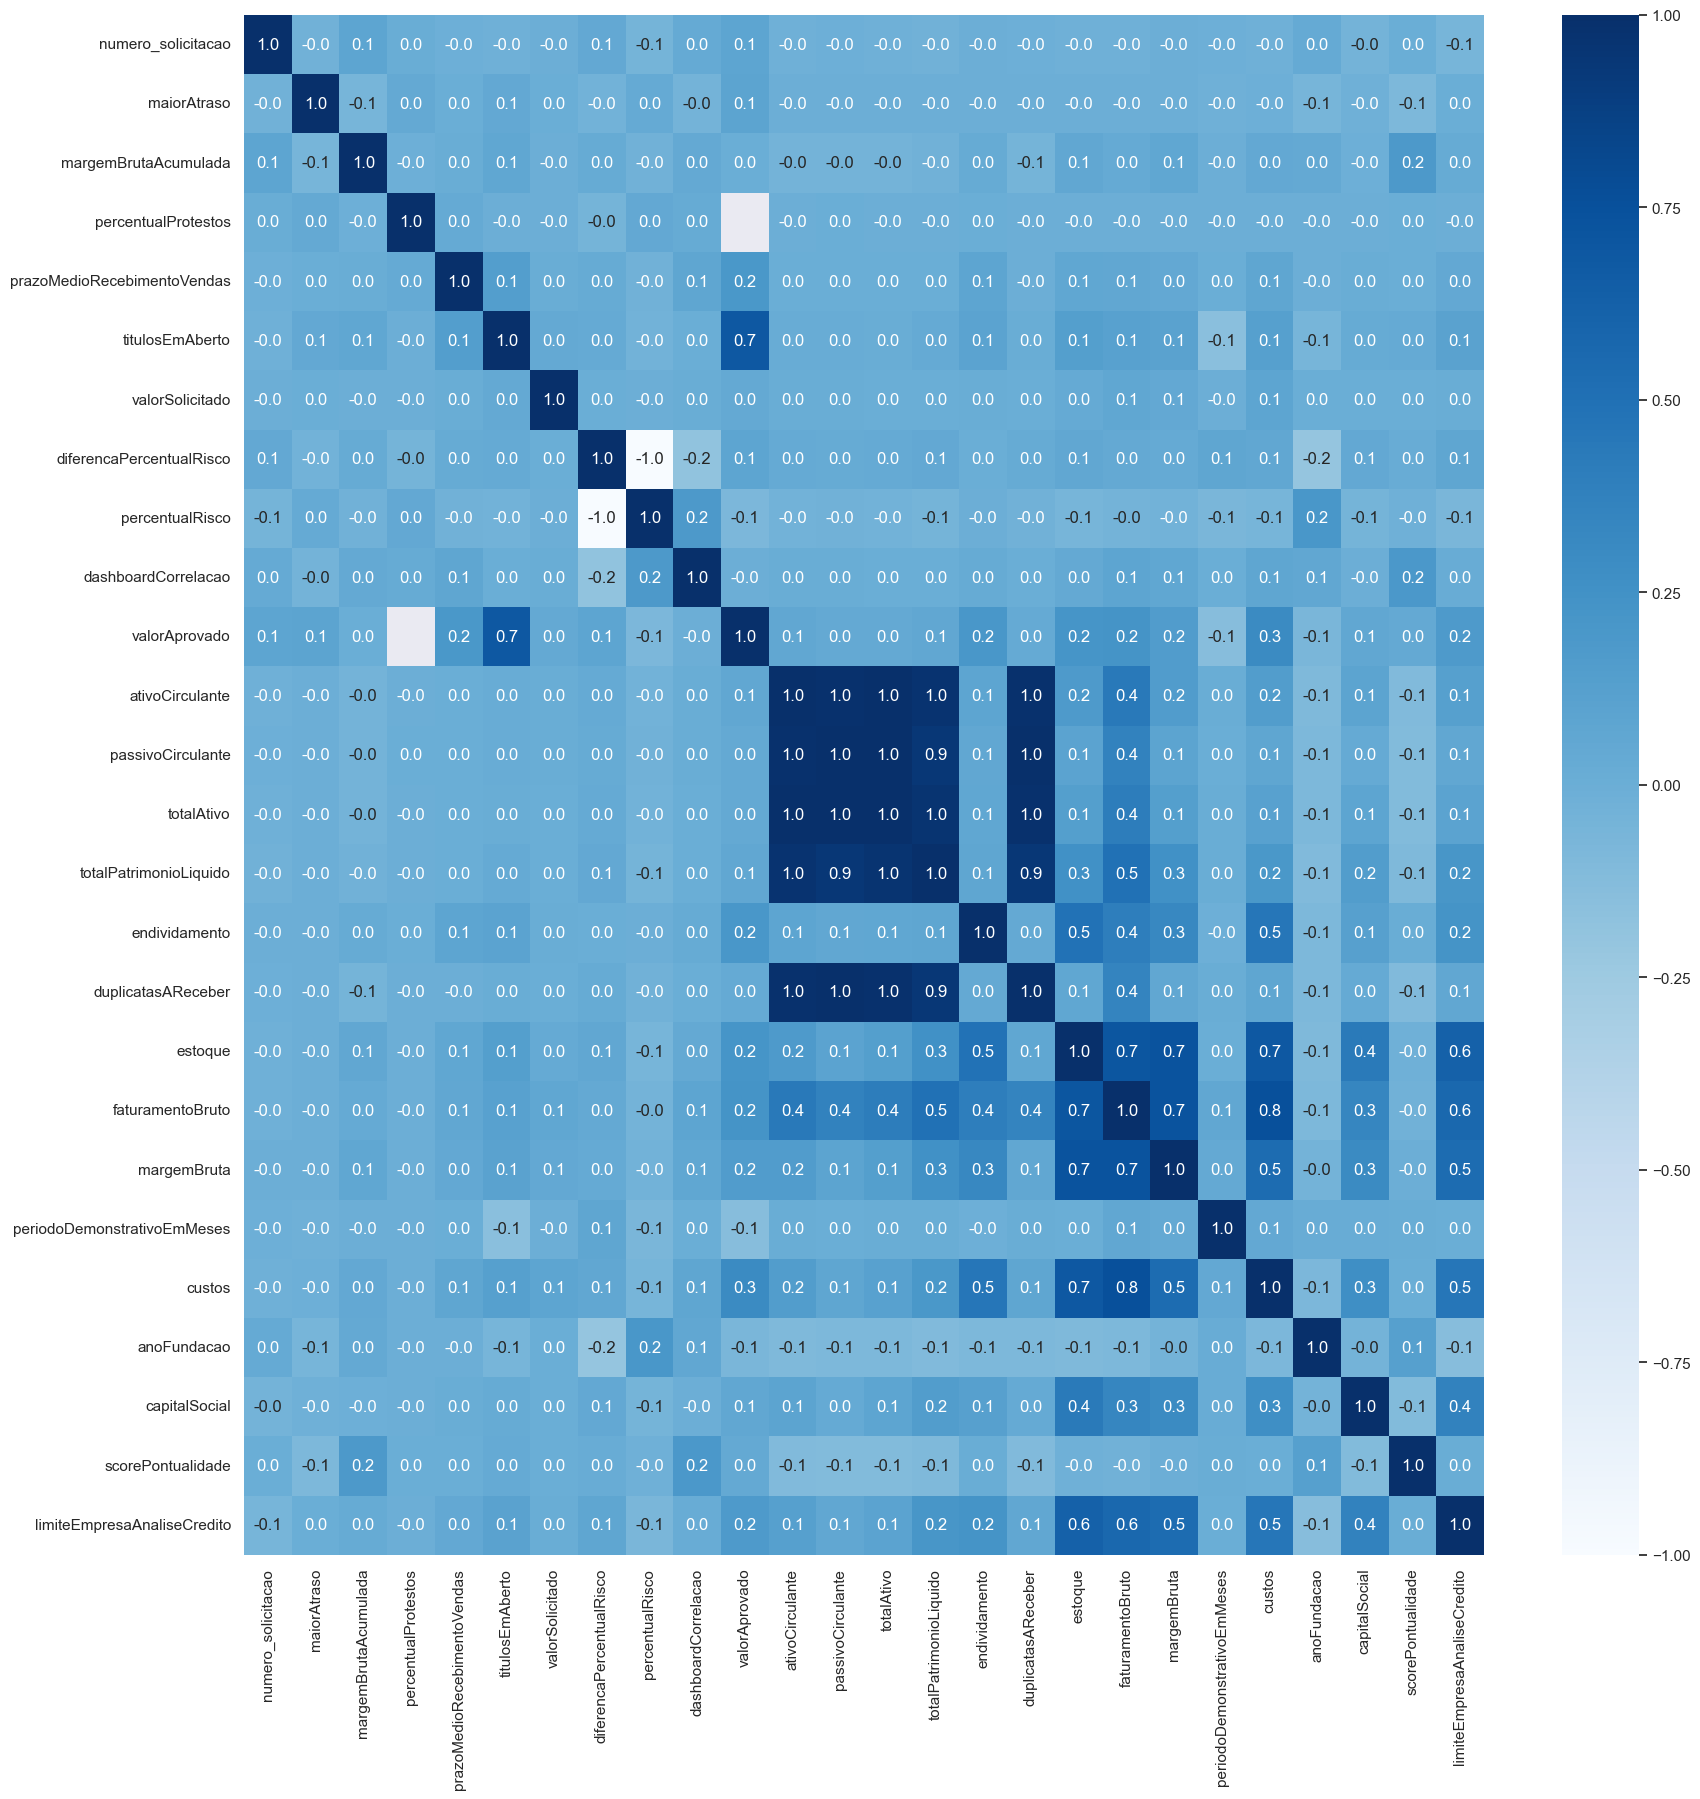

In [50]:
# Correlation Matrix DF DropNA

# Não funcionou usando esse método padrão de label encoding. Tentando com Dython.
# Convertendo categóricas em label encoding
#label_encoder = LabelEncoder()
#df_drop_na[categoricas] = label_encoder.fit_transform(df_drop_na[categoricas])


correlation_matrix = df_drop_na.corr(method='pearson')

plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')
plt.savefig('Correlation Heat map')

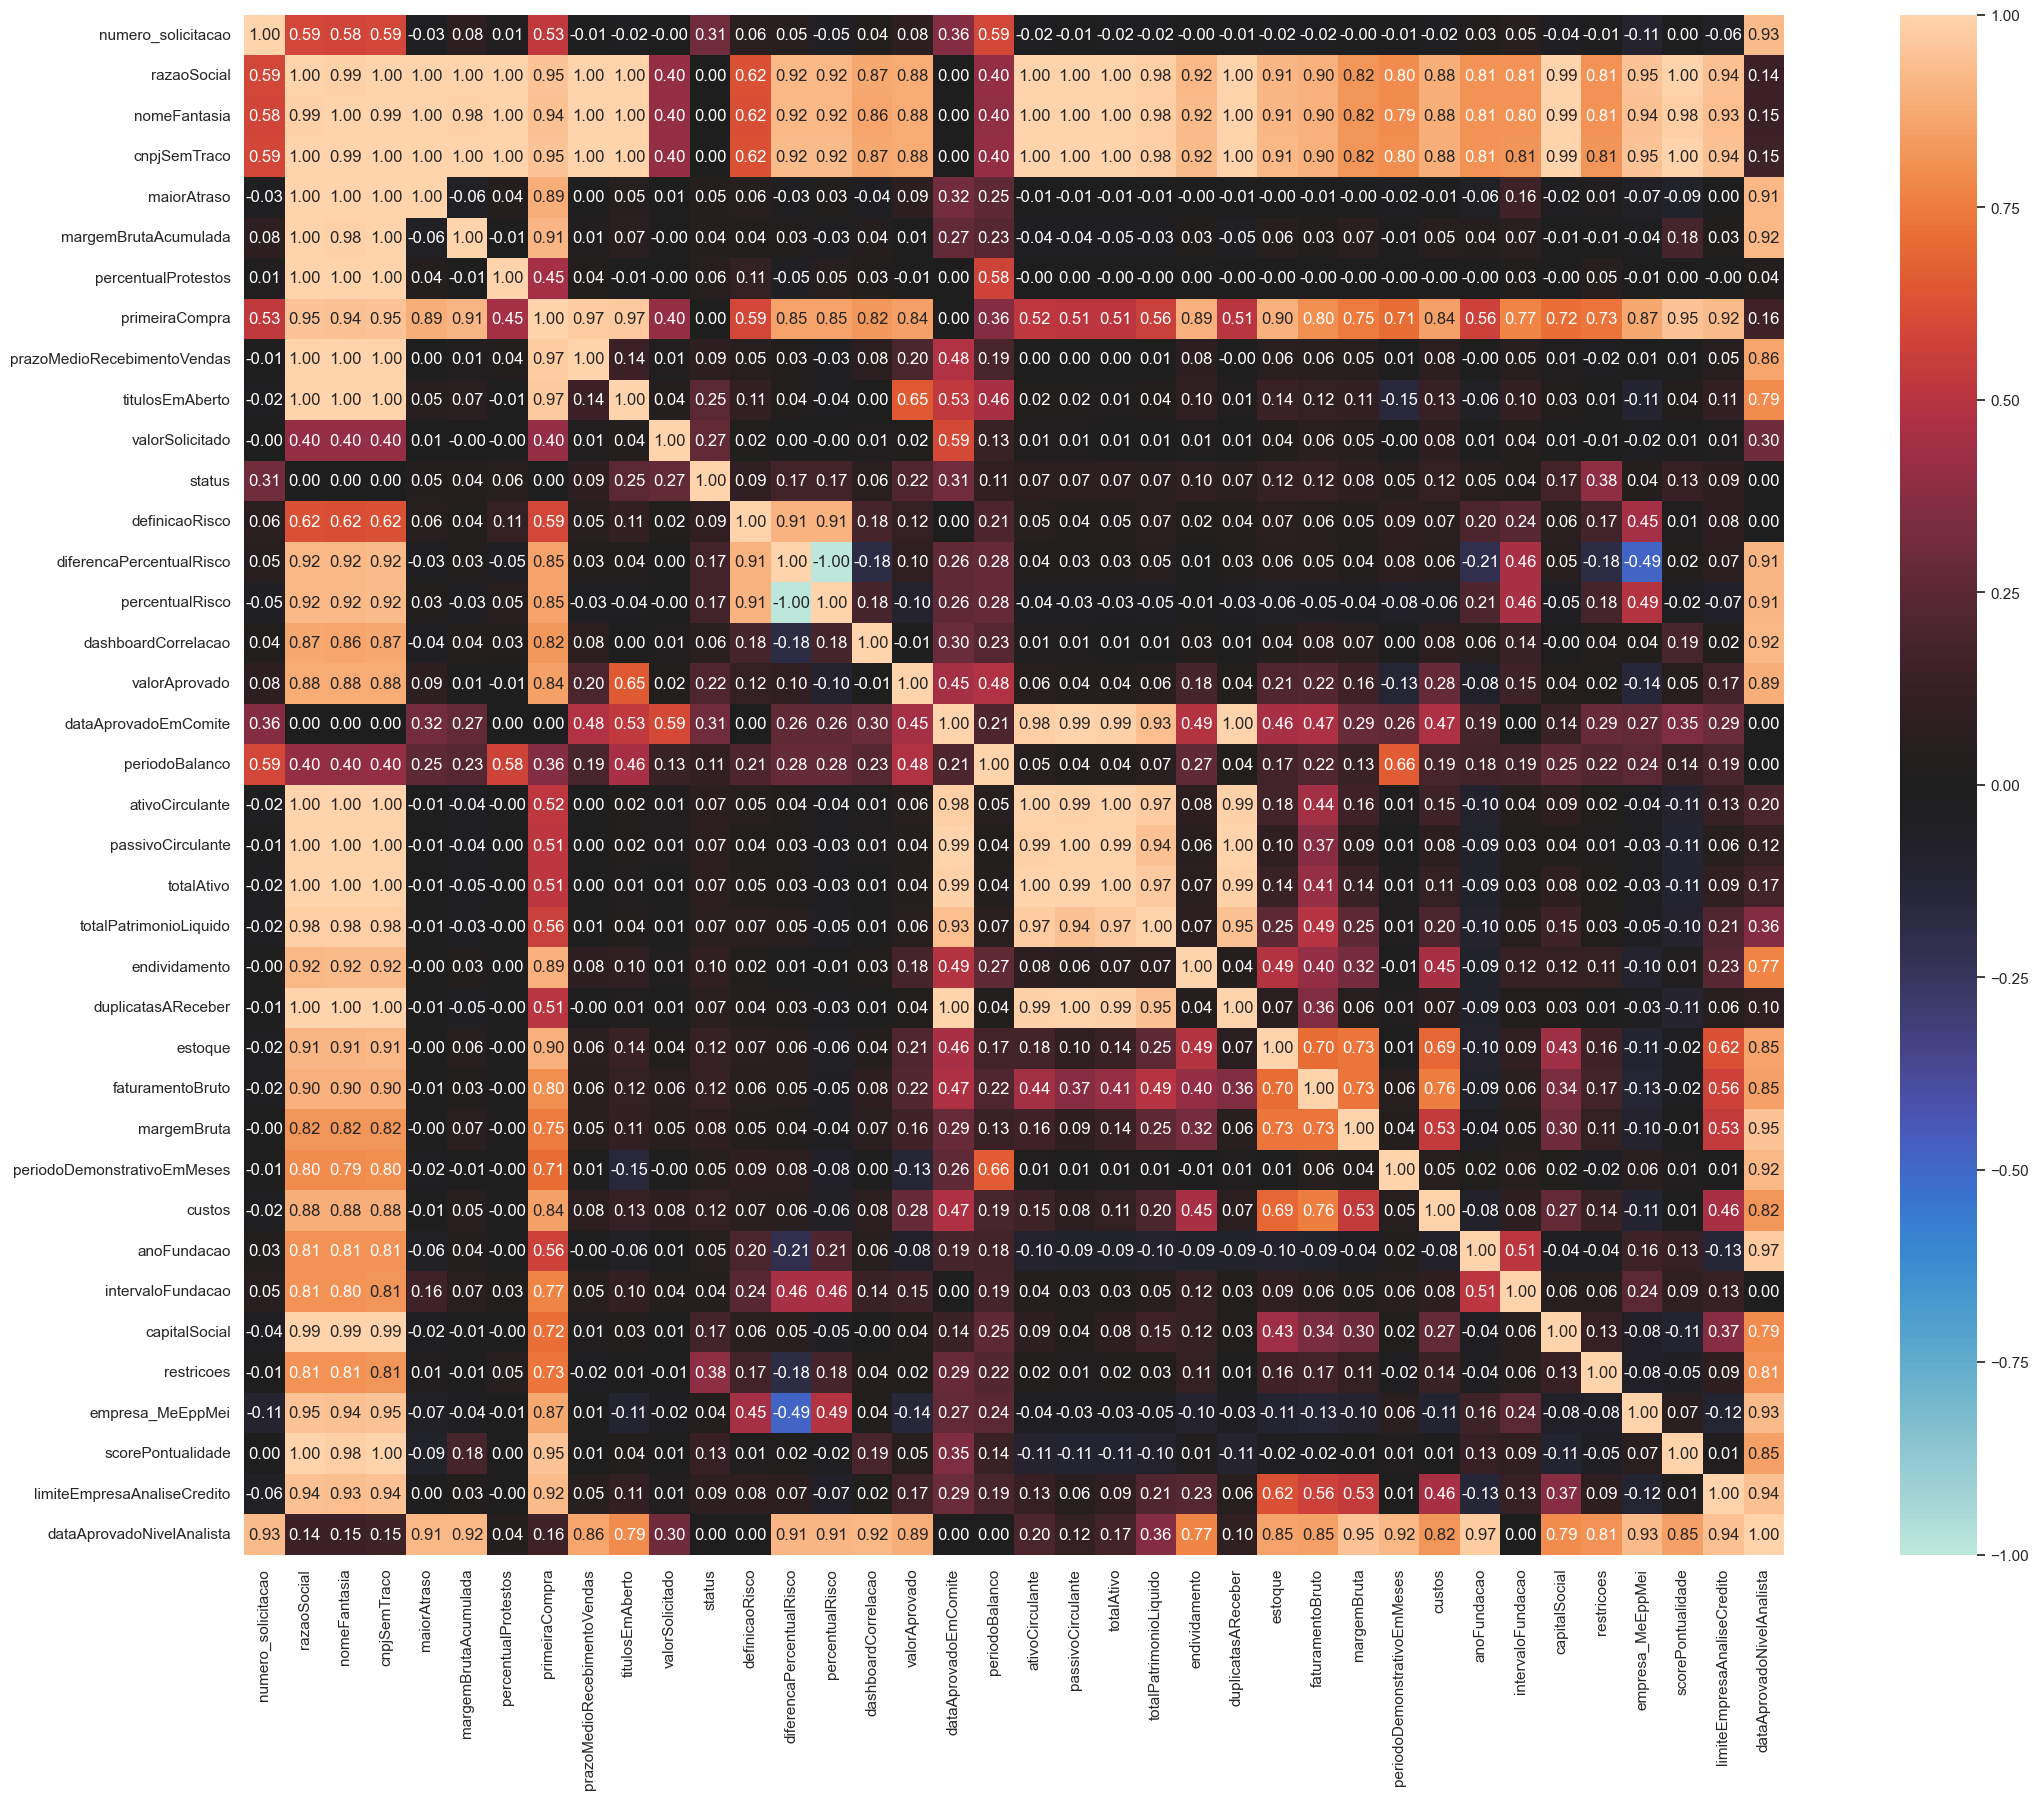

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,valorAprovado,dataAprovadoEmComite,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
numero_solicitacao,1.00,0.59,0.58,0.59,-0.03,0.08,0.01,0.53,-0.01,-0.02,-0.00,0.31,0.06,0.05,-0.05,0.04,0.08,0.36,0.59,-0.02,-0.01,-0.02,-0.02,-0.00,-0.01,-0.02,-0.02,-0.00,-0.01,-0.02,0.03,0.05,-0.04,-0.01,-0.11,0.00,-0.06,0.93
razaoSocial,0.59,1.00,0.99,1.00,1.00,1.00,1.00,0.95,1.00,1.00,0.40,0.00,0.62,0.92,0.92,0.87,0.88,0.00,0.40,1.00,1.00,1.00,0.98,0.92,1.00,0.91,0.90,0.82,0.80,0.88,0.81,0.81,0.99,0.81,0.95,1.00,0.94,0.14
nomeFantasia,0.58,0.99,1.00,0.99,1.00,0.98,1.00,0.94,1.00,1.00,0.40,0.00,0.62,0.92,0.92,0.86,0.88,0.00,0.40,1.00,1.00,1.00,0.98,0.92,1.00,0.91,0.90,0.82,0.79,0.88,0.81,0.80,0.99,0.81,0.94,0.98,0.93,0.15
cnpjSemTraco,0.59,1.00,0.99,1.00,1.00,1.00,1.00,0.95,1.00,1.00,0.40,0.00,0.62,0.92,0.92,0.87,0.88,0.00,0.40,1.00,1.00,1.00,0.98,0.92,1.00,0.91,0.90,0.82,0.80,0.88,0.81,0.81,0.99,0.81,0.95,1.00,0.94,0.15
maiorAtraso,-0.03,1.00,1.00,1.00,1.00,-0.06,0.04,0.89,0.00,0.05,0.01,0.05,0.06,-0.03,0.03,-0.04,0.09,0.32,0.25,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01,-0.00,-0.01,-0.00,-0.02,-0.01,-0.06,0.16,-0.02,0.01,-0.07,-0.09,0.00,0.91
margemBrutaAcumulada,0.08,1.00,0.98,1.00,-0.06,1.00,-0.01,0.91,0.01,0.07,-0.00,0.04,0.04,0.03,-0.03,0.04,0.01,0.27,0.23,-0.04,-0.04,-0.05,-0.03,0.03,-0.05,0.06,0.03,0.07,-0.01,0.05,0.04,0.07,-0.01,-0.01,-0.04,0.18,0.03,0.92
percentualProtestos,0.01,1.00,1.00,1.00,0.04,-0.01,1.00,0.45,0.04,-0.01,-0.00,0.06,0.11,-0.05,0.05,0.03,-0.01,0.00,0.58,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.03,-0.00,0.05,-0.01,0.00,-0.00,0.04
primeiraCompra,0.53,0.95,0.94,0.95,0.89,0.91,0.45,1.00,0.97,0.97,0.40,0.00,0.59,0.85,0.85,0.82,0.84,0.00,0.36,0.52,0.51,0.51,0.56,0.89,0.51,0.90,0.80,0.75,0.71,0.84,0.56,0.77,0.72,0.73,0.87,0.95,0.92,0.16
prazoMedioRecebimentoVendas,-0.01,1.00,1.00,1.00,0.00,0.01,0.04,0.97,1.00,0.14,0.01,0.09,0.05,0.03,-0.03,0.08,0.20,0.48,0.19,0.00,0.00,0.00,0.01,0.08,-0.00,0.06,0.06,0.05,0.01,0.08,-0.00,0.05,0.01,-0.02,0.01,0.01,0.05,0.86
titulosEmAberto,-0.02,1.00,1.00,1.00,0.05,0.07,-0.01,0.97,0.14,1.00,0.04,0.25,0.11,0.04,-0.04,0.00,0.65,0.53,0.46,0.02,0.02,0.01,0.04,0.10,0.01,0.14,0.12,0.11,-0.15,0.13,-0.06,0.10,0.03,0.01,-0.11,0.04,0.11,0.79


In [62]:
# Correlação de variáveis categóricas usando Dython
#
from dython.nominal import associations
corr_dython = associations(df_drop_na, nom_nom_assoc='cramer', num_num_assoc='pearson', figsize=(30, 20))
corr_dython["corr"]

In [63]:
# Correlações interessantes usando Dython contendo categóricas vs. Valor aprovado:

# primeiraCompra: 0.84
# titulosEmAberto 0.65
# dataAprovadoEmComite 0.45
# periodoBalanco 0.48
# dataAprovadoNivelAnalista 0.89
# custos 0.28
# faturamentoBruto 0.22
# estoque 0.21
# endividamento 0.18
# status 0.22
# prazoMedioRecebimentoVendas 0.20

In [64]:
# Identificando numericamente valores no df de drop_na
df_drop_na.corr().abs()

# Correlações numéricas interessantes utilizando Pearson em Pandas:
#
# prazoMedioRecebimentoVendas: 0.20
# endividamento: 0.20
# estoque: 0.22
# faturamentoBruto: 0.23
# custos: 0.30
# titulosEmAberto: 0.69

,numero_solicitacao,maiorAtraso,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,valorAprovado,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,capitalSocial,scorePontualidade,limiteEmpresaAnaliseCredito
numero_solicitacao,1.00,0.03,0.08,0.01,0.01,0.02,0.00,0.05,0.05,0.04,0.08,0.02,0.01,0.02,0.02,0.00,0.01,0.02,0.02,0.00,0.02,0.02,0.03,0.04,0.00,0.06
maiorAtraso,0.03,1.00,0.06,0.04,0.00,0.05,0.01,0.03,0.03,0.04,0.09,0.01,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.02,0.01,0.06,0.02,0.09,0.00
margemBrutaAcumulada,0.08,0.06,1.00,0.01,0.01,0.07,0.00,0.03,0.03,0.04,0.01,0.04,0.04,0.05,0.03,0.03,0.05,0.06,0.03,0.07,0.01,0.05,0.04,0.01,0.18,0.03
percentualProtestos,0.01,0.04,0.01,1.00,0.04,0.01,0.00,0.05,0.05,0.03,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
prazoMedioRecebimentoVendas,0.01,0.00,0.01,0.04,1.00,0.14,0.01,0.03,0.03,0.08,0.20,0.00,0.00,0.00,0.01,0.08,0.00,0.06,0.06,0.05,0.01,0.08,0.00,0.01,0.01,0.05
titulosEmAberto,0.02,0.05,0.07,0.01,0.14,1.00,0.04,0.04,0.04,0.00,0.69,0.02,0.02,0.01,0.04,0.10,0.01,0.14,0.12,0.11,0.15,0.13,0.06,0.03,0.04,0.11
valorSolicitado,0.00,0.01,0.00,0.00,0.01,0.04,1.00,0.00,0.00,0.01,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.04,0.06,0.05,0.00,0.08,0.01,0.01,0.01,0.01
diferencaPercentualRisco,0.05,0.03,0.03,0.05,0.03,0.04,0.00,1.00,1.00,0.18,0.08,0.04,0.03,0.03,0.05,0.01,0.03,0.06,0.05,0.04,0.08,0.06,0.21,0.05,0.02,0.07
percentualRisco,0.05,0.03,0.03,0.05,0.03,0.04,0.00,1.00,1.00,0.18,0.08,0.04,0.03,0.03,0.05,0.01,0.03,0.06,0.05,0.04,0.08,0.06,0.21,0.05,0.02,0.07
dashboardCorrelacao,0.04,0.04,0.04,0.03,0.08,0.00,0.01,0.18,0.18,1.00,0.01,0.01,0.01,0.01,0.01,0.03,0.01,0.04,0.08,0.07,0.00,0.08,0.06,0.00,0.19,0.02


In [65]:
# Identificando numericamente valores no df de média
df_mean_na.corr().abs()

,numero_solicitacao,maiorAtraso,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,valorAprovado,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,capitalSocial,scorePontualidade,limiteEmpresaAnaliseCredito
numero_solicitacao,1.00,0.00,0.12,0.01,0.03,0.04,0.01,0.18,0.18,0.01,0.12,0.01,0.00,0.01,0.01,0.00,0.01,0.01,0.01,0.02,0.02,0.02,0.04,0.01,0.10,0.00
maiorAtraso,0.00,1.00,0.01,0.01,0.02,0.04,0.01,0.03,0.03,0.02,0.07,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.05,0.01,0.02,0.01
margemBrutaAcumulada,0.12,0.01,1.00,0.02,0.13,0.13,0.00,0.02,0.02,0.01,0.06,0.05,0.05,0.05,0.06,0.08,0.03,0.09,0.10,0.07,0.02,0.09,0.01,0.02,0.79,0.03
percentualProtestos,0.01,0.01,0.02,1.00,0.02,0.01,0.00,0.01,0.01,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
prazoMedioRecebimentoVendas,0.03,0.02,0.13,0.02,1.00,0.16,0.01,0.06,0.06,0.03,0.10,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.02,0.02,0.02,0.02,0.00,0.01,0.14,0.00
titulosEmAberto,0.04,0.04,0.13,0.01,0.16,1.00,0.04,0.05,0.05,0.01,0.53,0.01,0.00,0.00,0.01,0.01,0.00,0.03,0.04,0.06,0.14,0.04,0.03,0.20,0.12,0.15
valorSolicitado,0.01,0.01,0.00,0.00,0.01,0.04,1.00,0.01,0.01,0.01,0.05,0.01,0.01,0.01,0.01,0.00,0.01,0.02,0.04,0.04,0.00,0.04,0.00,0.01,0.01,0.01
diferencaPercentualRisco,0.18,0.03,0.02,0.01,0.06,0.05,0.01,1.00,1.00,0.16,0.06,0.01,0.00,0.01,0.02,0.01,0.01,0.00,0.05,0.05,0.12,0.04,0.22,0.00,0.02,0.02
percentualRisco,0.18,0.03,0.02,0.01,0.06,0.05,0.01,1.00,1.00,0.16,0.06,0.01,0.00,0.01,0.02,0.01,0.01,0.00,0.05,0.05,0.12,0.04,0.22,0.00,0.02,0.02
dashboardCorrelacao,0.01,0.02,0.01,0.03,0.03,0.01,0.01,0.16,0.16,1.00,0.03,0.01,0.01,0.01,0.01,0.02,0.01,0.04,0.04,0.04,0.00,0.04,0.04,0.02,0.04,0.02


In [66]:
# Essas são as correlações interessantes, vou enviá-las para uma lista chamada pick_features.
#
pick_features = ['titulosEmAberto', 
                'custos', 
                'faturamentoBruto', 
                'estoque', 
                'endividamento', 
                'prazoMedioRecebimentoVendas', 
                'primeiraCompra', 
                'dataAprovadoEmComite', 
                'periodoBalanco', 
                'dataAprovadoNivelAnalista', 
                'status']

In [67]:
# Criando ranges de valorAprovado para facilitar a visualização de relações de busca do analista no momento de escolher um valor
#
df['rangevalorAprovado'] = pd.cut(df['valorAprovado'], 10, labels=['A-0-410k', 
                                                                   'B-410k-806k', 
                                                                   'C-806k-1.25mi', 
                                                                   'D-1.25mi-1.65mi', 
                                                                   'E-1.65mi-2.1mi', 
                                                                   'F-2.1mi-2.5mi', 
                                                                   'G-2.5mi-3mi', 
                                                                   'H-3mi-3.5mi', 
                                                                   'I-3.5mi-4mi', 
                                                                   'J-4mi+'])
lista = ['rangevalorAprovado', 'valorAprovado']
df[lista].groupby(['rangevalorAprovado'])['valorAprovado'].count()

# A maioria dos valores está acumulado no range de 0 a 410k;

rangevalorAprovado
A-0-410k           7231
B-410k-806k         221
C-806k-1.25mi        68
D-1.25mi-1.65mi      24
E-1.65mi-2.1mi       12
F-2.1mi-2.5mi         5
G-2.5mi-3mi           6
H-3mi-3.5mi           0
I-3.5mi-4mi           1
J-4mi+                1
Name: valorAprovado, dtype: int64

In [68]:
# Mesma contagem, porém, verificando apenas nos aprovados
#
df_aprovados_analista = df.where(df.status=='AprovadoAnalista')

lista = ['rangevalorAprovado', 'valorAprovado']
df_aprovados_analista[lista].groupby(['rangevalorAprovado'])['valorAprovado'].count()

rangevalorAprovado
A-0-410k           6747
B-410k-806k         181
C-806k-1.25mi        51
D-1.25mi-1.65mi      17
E-1.65mi-2.1mi        9
F-2.1mi-2.5mi         1
G-2.5mi-3mi           5
H-3mi-3.5mi           0
I-3.5mi-4mi           0
J-4mi+                0
Name: valorAprovado, dtype: int64

In [69]:
# Mesma contagem, porém, verificando apenas nos reprovados
#
df_aprovados_analista = df.where(df.status!='AprovadoAnalista')

lista = ['rangevalorAprovado', 'valorAprovado']
df_aprovados_analista[lista].groupby(['rangevalorAprovado'])['valorAprovado'].count()

# Aparentemente a distribuição é normal entre aprovados e reprovados com base no range de valor. 

rangevalorAprovado
A-0-410k           484
B-410k-806k         40
C-806k-1.25mi       17
D-1.25mi-1.65mi      7
E-1.65mi-2.1mi       3
F-2.1mi-2.5mi        4
G-2.5mi-3mi          1
H-3mi-3.5mi          0
I-3.5mi-4mi          1
J-4mi+               1
Name: valorAprovado, dtype: int64

In [70]:
# Buscando padrões pela sumarização do range criado e status aprovados pelo analista
#
lista = ['rangevalorAprovado', 'prazoMedioRecebimentoVendas']
range_prazo = df_aprovados_analista[lista].groupby(['rangevalorAprovado']).mean()
range_prazo.sort_values(by='prazoMedioRecebimentoVendas', ascending=False)

# No Range A a médio de recebimento é 30 dias,
# B = 60 dias;
# C = de 90 a 100 dias;
# D = 65 dias;
# E = 65 dias;
# D = 62 dias;
# F = 65 dias;
# G = 130 dias;
# H = 280 dias;
# I = 508 dias;
# J = Verificar zerado;

,prazoMedioRecebimentoVendas
rangevalorAprovado,
C-806k-1.25mi,58.44
B-410k-806k,49.33
A-0-410k,42.28
E-1.65mi-2.1mi,29.00
F-2.1mi-2.5mi,15.50
D-1.25mi-1.65mi,11.00
I-3.5mi-4mi,6.00
J-4mi+,6.00
G-2.5mi-3mi,NaN


In [71]:
# Buscando padrões pela sumarização do range criado e status aprovados pelo analista
#
df_aprovados_analista = df.where(df.status=='AprovadoAnalista')
lista = ['rangevalorAprovado', 'titulosEmAberto']
range_titulosEmAberto = df_aprovados_analista[lista].groupby(['rangevalorAprovado']).mean()
range_titulosEmAberto.sort_values(by='titulosEmAberto', ascending=False)

,titulosEmAberto
rangevalorAprovado,
B-410k-806k,347656.76
C-806k-1.25mi,233820.57
D-1.25mi-1.65mi,154941.09
E-1.65mi-2.1mi,87018.87
A-0-410k,58423.12
F-2.1mi-2.5mi,NaN
G-2.5mi-3mi,NaN
H-3mi-3.5mi,NaN
I-3.5mi-4mi,NaN


In [72]:
# Buscando padrões pela sumarização do range criado e status aprovados pelo analista
#
df_aprovados_analista = df.where(df.status=='AprovadoAnalista')
lista = ['rangevalorAprovado', 'endividamento']
range_endividamento = df_aprovados_analista[lista].groupby(['rangevalorAprovado']).mean()
range_endividamento.sort_values(by='endividamento', ascending=False)

,endividamento
rangevalorAprovado,
D-1.25mi-1.65mi,8029978.70
C-806k-1.25mi,5473291.79
B-410k-806k,3409778.74
G-2.5mi-3mi,3116477.67
E-1.65mi-2.1mi,2313441.00
A-0-410k,2046413.54
F-2.1mi-2.5mi,NaN
H-3mi-3.5mi,NaN
I-3.5mi-4mi,NaN


In [73]:
# Buscando padrões pela sumarização do range criado e status aprovados pelo analista
#
df_aprovados_analista = df.where(df.status=='AprovadoAnalista')
lista = ['rangevalorAprovado', 'estoque']
range_estoque = df_aprovados_analista[lista].groupby(['rangevalorAprovado']).mean()
range_estoque.sort_values(by='estoque', ascending=False)

,estoque
rangevalorAprovado,
D-1.25mi-1.65mi,44967681.67
G-2.5mi-3mi,44444561.00
C-806k-1.25mi,20988516.00
B-410k-806k,16452438.05
A-0-410k,4420518.63
E-1.65mi-2.1mi,NaN
F-2.1mi-2.5mi,NaN
H-3mi-3.5mi,NaN
I-3.5mi-4mi,NaN


In [74]:
# Buscando padrões pela sumarização do range criado e status aprovados pelo analista
#
df_aprovados_analista = df.where(df.status=='AprovadoAnalista')
lista = ['rangevalorAprovado', 'faturamentoBruto']
range_faturamentoBruto = df_aprovados_analista[lista].groupby(['rangevalorAprovado']).mean()
range_faturamentoBruto.sort_values(by='faturamentoBruto', ascending=False)

,faturamentoBruto
rangevalorAprovado,
D-1.25mi-1.65mi,133063609.50
C-806k-1.25mi,93657300.65
B-410k-806k,73955797.47
A-0-410k,14101438.84
E-1.65mi-2.1mi,NaN
F-2.1mi-2.5mi,NaN
G-2.5mi-3mi,NaN
H-3mi-3.5mi,NaN
I-3.5mi-4mi,NaN


In [75]:
# Buscando padrões pela sumarização do range criado e status aprovados pelo analista
#
df_aprovados_analista = df.where(df.status=='AprovadoAnalista')
lista = ['rangevalorAprovado', 'margemBruta']
range_margemBruta = df_aprovados_analista[lista].groupby(['rangevalorAprovado']).mean()
range_margemBruta.sort_values(by='margemBruta', ascending=False)

,margemBruta
rangevalorAprovado,
E-1.65mi-2.1mi,77696798.00
G-2.5mi-3mi,77696798.00
D-1.25mi-1.65mi,39865642.80
C-806k-1.25mi,32543677.53
B-410k-806k,23943745.71
A-0-410k,7961499.44
F-2.1mi-2.5mi,NaN
H-3mi-3.5mi,NaN
I-3.5mi-4mi,NaN


In [76]:
# Buscando padrões pela sumarização do range criado e status aprovados pelo analista
#
df_aprovados_analista = df.where(df.status=='AprovadoAnalista')
lista = ['rangevalorAprovado', 'custos']
range_custos = df_aprovados_analista[lista].groupby(['rangevalorAprovado']).mean()
range_custos.sort_values(by='custos', ascending=False)

,custos
rangevalorAprovado,
D-1.25mi-1.65mi,69705746.60
C-806k-1.25mi,59260856.09
B-410k-806k,47609024.21
A-0-410k,13266210.29
E-1.65mi-2.1mi,NaN
F-2.1mi-2.5mi,NaN
G-2.5mi-3mi,NaN
H-3mi-3.5mi,NaN
I-3.5mi-4mi,NaN


In [77]:
# Buscando padrões pela sumarização do range criado e status aprovados pelo analista
#
df_aprovados_analista = df.where(df.status=='AprovadoAnalista')
lista = ['rangevalorAprovado', 'limiteEmpresaAnaliseCredito']
range_limiteEmpresaAnaliseCredito = df_aprovados_analista[lista].groupby(['rangevalorAprovado']).mean()
range_limiteEmpresaAnaliseCredito.sort_values(by='limiteEmpresaAnaliseCredito', ascending=False)

,limiteEmpresaAnaliseCredito
rangevalorAprovado,
C-806k-1.25mi,4353473.55
B-410k-806k,4341356.38
A-0-410k,553028.85
E-1.65mi-2.1mi,1000.00
D-1.25mi-1.65mi,NaN
F-2.1mi-2.5mi,NaN
G-2.5mi-3mi,NaN
H-3mi-3.5mi,NaN
I-3.5mi-4mi,NaN


In [169]:
# Criando campo de porcentagem em relação ao valorAprovado para as variáveis de valores numéricos nas features escolhidas
#
# Casos de missing na porcentagem são de solicitações negadas ou valor ausente na coluna calculada

porcentagens = ['titulosEmAberto',
                'custos',
                'faturamentoBruto',
                'estoque',
                'endividamento']

df[porcentagens] = df[porcentagens].fillna(0)

for coluna in porcentagens:
    df['pct_'+coluna] = ( df[coluna] / df['valorAprovado'] ) * 100
    df['pct_'+coluna] = df['pct_'+coluna].fillna(0)

#df['pct_titulosEmAberto'] = ( df['titulosEmAberto'] / df['valorAprovado'] ) * 100
#df['pct_custos'] = ( df['custos'] / df['valorAprovado'] ) * 100
#df['pct_faturamentoBruto'] = ( df['faturamentoBruto'] / df['valorAprovado'] ) * 100
#df['pct_estoque'] = ( df['estoque'] / df['valorAprovado'] ) * 100
#df['pct_endividamento'] = ( df['endividamento'] / df['valorAprovado'] ) * 100

lista = ['rangevalorAprovado', 'valorAprovado', 'titulosEmAberto', 'pct_titulosEmAberto', 
                                                                    'custos', 'pct_custos',
                                                                    'faturamentoBruto', 'pct_faturamentoBruto',
                                                                    'estoque', 'pct_estoque',
                                                                    'endividamento', 'pct_endividamento']
df[lista]

,rangevalorAprovado,valorAprovado,titulosEmAberto,pct_titulosEmAberto,custos,pct_custos,faturamentoBruto,pct_faturamentoBruto,estoque,pct_estoque,endividamento,pct_endividamento
0,A-0-410k,50000.00,0.00,0.00,0.00,0.00,1766880.00,3533.76,0.00,0.00,0.00,0.00
1,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,A-0-410k,20000.00,0.00,0.00,0.00,0.00,2814940.00,14074.70,0.00,0.00,0.00,0.00
3,A-0-410k,15000.00,0.00,0.00,0.00,0.00,1285274.00,8568.49,0.00,0.00,0.00,0.00
4,A-0-410k,50000.00,1486.95,2.97,40680051.00,81360.10,40779757.00,81559.51,3047791.00,6095.58,3039112.00,6078.22
...,...,...,...,...,...,...,...,...,...,...,...,...
8968,NaN,NaN,599964.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8969,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8970,NaN,NaN,2933.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8971,NaN,NaN,559679.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# Por enquanto temos as colunas calculadas de Range Valor, porcentagens em relação ao valor;